In [2]:
#se monta el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Carga de sprites**

personaje:


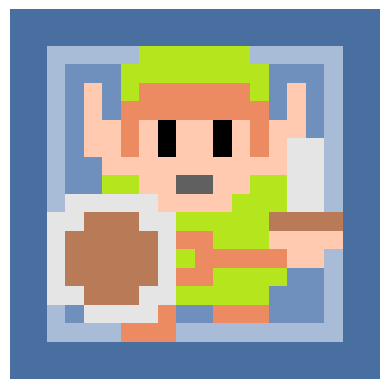

suelo:


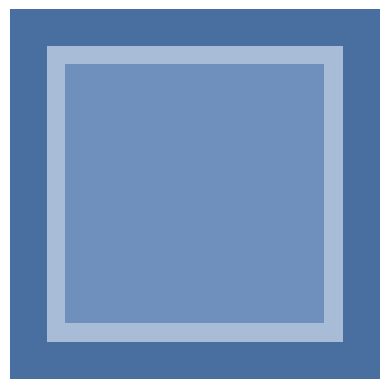

pared:


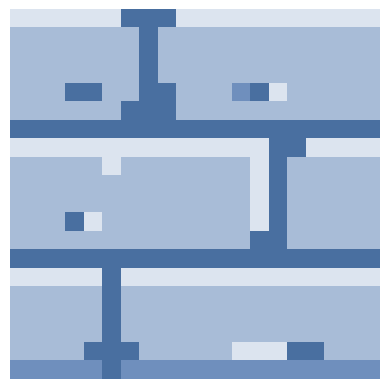

marca:


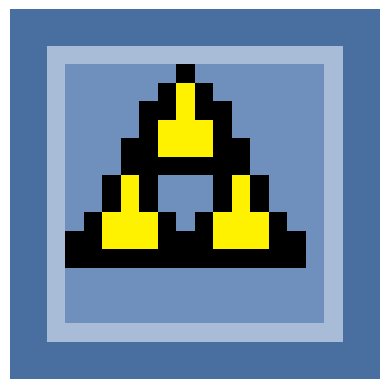

caja:


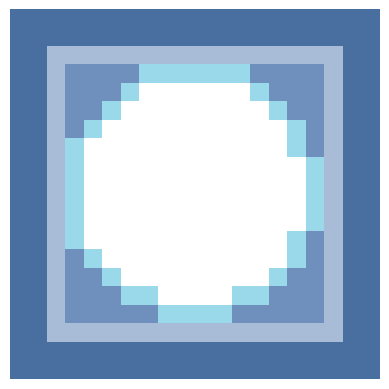

caja activada:


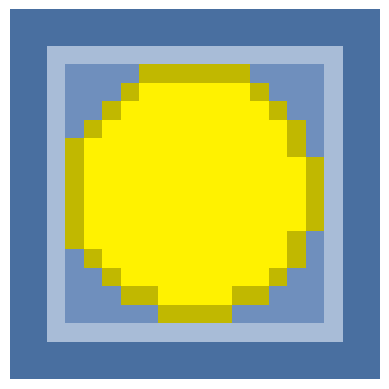

In [4]:
#-----------------------------------------------------------------------------------
#se importan las librerias, puede haber librerias adicionales, las cuales se exploró su uso y luego se descartaron
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import copy
#------------------------------------------------------------------------------------
# Se carga los sprites y se imprime las imagenes
# Ruta de los sprites
ubicacion_imagen_personaje = '/content/drive/MyDrive/personaje.png'
ubicacion_imagen_suelo = '/content/drive/MyDrive/suelo.png'
ubicacion_imagen_pared = '/content/drive/MyDrive/pared.png'
ubicacion_imagen_marca = '/content/drive/MyDrive/marca.png'
ubicacion_imagen_caja = '/content/drive/MyDrive/caja.png'
ubicacion_imagen_caja_activada = '/content/drive/MyDrive/caja_activada.png'

sprite_personaje = plt.imread(ubicacion_imagen_personaje)
sprite_suelo = plt.imread(ubicacion_imagen_suelo)
sprite_pared = plt.imread(ubicacion_imagen_pared)
sprite_marca = plt.imread(ubicacion_imagen_marca)
sprite_caja = plt.imread(ubicacion_imagen_caja)
sprite_caja_activada = plt.imread(ubicacion_imagen_caja_activada)

# se elimina el cuarto canal, que es el canal de transparencia y no se necesita.
sprite_personaje =sprite_personaje [:,:,:3]
sprite_suelo =sprite_suelo [:,:,:3]
sprite_pared =sprite_pared [:,:,:3]
sprite_marca =sprite_marca [:,:,:3]
sprite_caja =sprite_caja [:,:,:3]
sprite_caja_activada =sprite_caja_activada [:,:,:3]
#se hace un print comprobar la visualización
print('personaje:')
plt.axis("off")
plt.imshow(sprite_personaje)
plt.show()
print('suelo:')
plt.axis("off")
plt.imshow(sprite_suelo)
plt.show()
print('pared:')
plt.axis("off")
plt.imshow(sprite_pared)
plt.show()
print('marca:')
plt.axis("off")
plt.imshow(sprite_marca)
plt.show()
print('caja:')
plt.axis("off")
plt.imshow(sprite_caja)
plt.show()
print('caja activada:')
plt.axis("off")
plt.imshow(sprite_caja_activada)
plt.show()

# **Carga de mapa a modo de ejemplo**

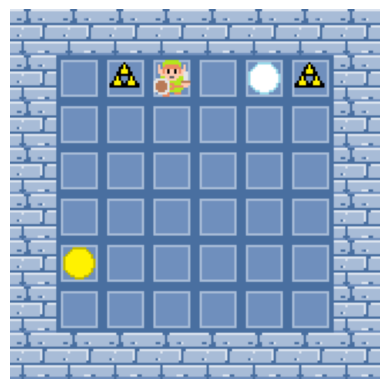

In [5]:
#--------------------------------------------------------------------------------------------------------------------------
#Para el tamaño del mapa se usa la referencia https://www.youtube.com/watch?v=YtZqAlqV1h8)
#los sprites tienen una dimencion de 20x20
#se crea el mapa
#se necesita que en el mapa inicial el personaje ni las cajas esten, ya que se usa para saber una vez que se mueve el personaje qué tipo de celda queda

# '/' es la pared ; ' ' es el suelo ; 'M' es la marca

mapa_original= [
    ['/', '/', '/', '/', '/', '/', '/',  '/'],
    ['/', ' ', 'M', ' ', ' ', ' ', 'M',  '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ',  '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ',  '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ',  '/'],
    ['/', 'M', ' ', ' ', ' ', ' ', ' ',  '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ',  '/'],
    ['/', '/', '/', '/', '/', '/', '/',  '/']


]

#se define la ubicación del personaje, en python el extremo superior izquierdo es el (0,0)
posicion_inicial_personaje_fila=1
posicion_inicial_personaje_columna=3
#se define la ubicación de las cajas
caja_1_x=5
caja_1_y=1
caja_2_x=1
caja_2_y=5

#se pasa a un array
mapa_original=np.array(mapa_original)
mapa_simbolo=np.array(mapa_original)
#se añade el personaje
mapa_simbolo[posicion_inicial_personaje_fila,posicion_inicial_personaje_columna]='P'
#se añade las cajas
mapa_simbolo[caja_1_x,caja_1_y]='X'
mapa_simbolo[caja_2_x,caja_2_y]='X'

#se obtiene las dimensiones del mapa
filas,columnas= np.shape(mapa_simbolo)

#Se crea la imagen del mapa en negro con los tres canales
#cada sprite es 20x20 pixeles, por eso se multiplica las filas y columnas por 20
imagen_mapa= np.zeros((filas*20,columnas*20, 3))
#se añade los sprites correspondientes a cada pixel
for i in range(filas):
  for j in range(columnas):
    if mapa_simbolo[i][j] == 'P':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_personaje
    if mapa_simbolo[i][j] == '/':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_pared
    if mapa_simbolo[i][j] == ' ':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_suelo
    if mapa_simbolo[i][j] == 'M':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_marca
    if mapa_simbolo[i][j] == 'X':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_caja
    if mapa_simbolo[i][j] == 'X' and mapa_original[i][j] =='M':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_caja_activada
#se grafica
plt.axis("off")
plt.imshow(imagen_mapa)
plt.show()

# **Se define el sistema para poder mover al personaje y testear el código**

**Función para mover al personaje**

In [6]:
import numpy as np
import pandas as pd
from tabulate import tabulate
#---------------------------------------------------------------------
#Se crea las funciones para graficar el mapa de forma simbolica e imagen

def graficar_mapa_simbolico(mapa_simbolo):
  # Se grafica el data frame
  df = pd.DataFrame(mapa_simbolo)
  print(df)

def graficar_mapa_imagen(mapa_simbolo):
  filas,columnas= np.shape(mapa_simbolo)
  #Se crea la imagen del mapa
  imagen_mapa= np.zeros((filas*20,columnas*20, 3))
  for i in range(filas):
    for j in range(columnas):
      if mapa_simbolo[i][j] == 'P':
        imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_personaje
      if mapa_simbolo[i][j] == '/':
        imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_pared
      if mapa_simbolo[i][j] == ' ':
        imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_suelo
      if mapa_simbolo[i][j] == 'M':
        imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_marca
      if mapa_simbolo[i][j] == 'X':
        imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_caja
      if mapa_simbolo[i][j] == 'X' and mapa_original[i][j] =='M':
        imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_caja_activada
  plt.axis("off")
  plt.imshow(imagen_mapa)
  plt.show()

#----------------------------------------------------------------------
#Se define el significado de los símbolos
personaje='P'
piso=' '
caja='X'
caja_activada='A'
marca='M'
pared='/'
#----------------------------------------------------------------------
#se define los movimientos

arriba='w'
abajo='s'
izquierda='a'
derecha='d'
#----------------------------------------------------------------------
#conteo de cajas
cantidad_cajas=np.sum(mapa_simbolo == caja)
#conteno de marca
cantidad_marcas=np.sum(mapa_original == marca)
#se crea el contador de cajas en el lugar correcto
def cantidad_cajas_activadas(mapa_simbolo):
  #se crea el contador de cajas en el lugar correcto
  posicion_caja = np.argwhere(mapa_simbolo == caja)
  posicion_marca = np.argwhere(mapa_original == marca)
  #se crea la posición de las cajas y marcas, se agrupan en un tuple por fila y se comparan
  conjunto_caja = set(map(tuple, posicion_caja))
  conjunto_fila = set(map(tuple, posicion_marca))
  cantidad_cajas_activadas = conjunto_caja.intersection(conjunto_fila)
  #el código devuelve los elementos en comun, uno quiere la cantidad
  return len(cantidad_cajas_activadas)


def mover(mapa_simbolo,direccion):

  #--------------------------------------------------------------------------------------------------------------------------
  # no se ejecuta la funcion si no coincide las marcas con las cajas(que el juego tenga una solución)
  # mas avanzado el codigo se saca esto
  if cantidad_cajas != cantidad_marcas:
    print("No coincide las marcas con las cajas, no se inicia el juego")
    return
  #--------------------------------------------------------------------------------------------------------------------------
  #se define la posición del personaje, el personaje debe estar una vez solamente en el tablero
  posicion = np.argwhere(mapa_simbolo == personaje)
  x, y = posicion[0]
  #-------------------------------------------------------------------------------------------------------------------------
  #se establece cada dirección posible
  if direccion == arriba:
  #se calcula la nueva posición
    nueva_x = x - 1
  #se verifica si se encuentra con una pared
  #se mueve si la proxima celda es un suelo o marca
    if mapa_simbolo[nueva_x, y] == piso or mapa_simbolo[nueva_x, y] == marca:
  #se mueve el personaje
      mapa_simbolo[x, y] = mapa_original[x,y] #donde estaba pasa a ser el piso o marca
      mapa_simbolo[nueva_x, y] = personaje
    #si se encuentra con una caja, la mueve si no hay una pared o caja en la celda objetivo
    if mapa_simbolo[nueva_x, y] == caja:
      if mapa_simbolo[nueva_x-1, y] == pared or mapa_simbolo[nueva_x-1, y] == caja:
        print(f"Movimiento no valido: no se puede epujar la caja")
    # se mueve la caja
      if mapa_simbolo[nueva_x-1, y] == piso or mapa_simbolo[nueva_x-1, y] == marca:
        mapa_simbolo[x, y] =mapa_original[x,y]
        mapa_simbolo[nueva_x, y] = personaje
        mapa_simbolo[nueva_x-1, y] = caja
    # si el personaje encuentra una pared
    if mapa_simbolo[nueva_x, y] == pared:
      print(f"Movimiento no valido: encuentro con pared")
  #--------------------------------------------------------------------------------------------------------------------------
  # se repite el codigo para las demas direcciones, siendo análogo el procedimiento


  if direccion == abajo:
  # Se calcula la nueva posición
    nueva_x = x + 1
  #se verifica si se encuentra con una pared
  #se mueve si la proxima celda es un suelo o marca
    if mapa_simbolo[nueva_x, y] == piso or mapa_simbolo[nueva_x, y] == marca:
  #se mueve el personaje
      mapa_simbolo[x, y] = mapa_original[x,y] #donde estaba pasa a ser el piso o marca
      mapa_simbolo[nueva_x, y] = personaje
    #si se encuentra con una caja, la mueve si no hay una pared o caja en la celda objetivo
    if mapa_simbolo[nueva_x, y] == caja:
      if mapa_simbolo[nueva_x+1, y] == pared or mapa_simbolo[nueva_x+1, y] == caja:
        print(f"Movimiento no valido: no se puede epujar la caja")
    # se mueve la caja
      if mapa_simbolo[nueva_x+1, y] == piso or mapa_simbolo[nueva_x+1, y] == marca:
        mapa_simbolo[x, y] =mapa_original[x,y]
        mapa_simbolo[nueva_x, y] = personaje
        mapa_simbolo[nueva_x+1, y] = caja
    # si el personaje encuentra una pared
    if mapa_simbolo[nueva_x, y] == pared:
      print(f"Movimiento no valido: encuentro con pared")
  #--------------------------------------------------------------------------------------------------------------------------
  if direccion == izquierda:
  # Se calcula la nueva posición
    nueva_y = y - 1
  #se verifica si se encuentra con una pared
  #se mueve si la proxima celda es un suelo o marca
    if mapa_simbolo[x,nueva_y] == piso or mapa_simbolo[x,nueva_y] == marca:
  #se mueve el personaje
      mapa_simbolo[x, y] = mapa_original[x,y] #donde estaba pasa a ser el piso o marca
      mapa_simbolo[x,nueva_y] = personaje
    #si se encuentra con una caja, la mueve si no hay una pared o caja en la celda objetivo
    if mapa_simbolo[x,nueva_y] == caja:
      if mapa_simbolo[x,nueva_y-1] == pared or mapa_simbolo[x,nueva_y-1] == caja:
        print(f"Movimiento no valido: no se puede epujar la caja")
    # se mueve la caja
      if mapa_simbolo[x,nueva_y-1] == piso or mapa_simbolo[x,nueva_y-1] == marca:
        mapa_simbolo[x, y] =mapa_original[x,y]
        mapa_simbolo[x,nueva_y] = personaje
        mapa_simbolo[x,nueva_y-1] = caja
    # si el personaje encuentra una pared
    if mapa_simbolo[x,nueva_y] == pared:
      print(f"Movimiento no valido: encuentro con pared")
  #--------------------------------------------------------------------------------------------------------------------------
  if direccion == derecha:
  # Se calcula la nueva posición
    nueva_y = y + 1
  #se verifica si se encuentra con una pared
  #se mueve si la proxima celda es un suelo o marca
    if mapa_simbolo[x,nueva_y] == piso or mapa_simbolo[x,nueva_y] == marca:
  #se mueve el personaje
      mapa_simbolo[x, y] = mapa_original[x,y] #donde estaba pasa a ser el piso o marca
      mapa_simbolo[x,nueva_y] = personaje
    #si se encuentra con una caja, la mueve si no hay una pared o caja en la celda objetivo
    if mapa_simbolo[x,nueva_y] == caja:
      if mapa_simbolo[x,nueva_y+1] == pared or mapa_simbolo[x,nueva_y+1] == caja:
        print(f"Movimiento no valido: no se puede epujar la caja")
    # se mueve la caja
      if mapa_simbolo[x,nueva_y+1] == piso or mapa_simbolo[x,nueva_y+1] == marca:
        mapa_simbolo[x, y] =mapa_original[x,y]
        mapa_simbolo[x,nueva_y] = personaje
        mapa_simbolo[x,nueva_y+1] = caja
    # si el personaje encuentra una pared
    if mapa_simbolo[x,nueva_y] == pared:
      print(f"Movimiento no valido: encuentro con pared")
  #---------------------------------------------------------------------------------------------------------------------------
  # se comprueba la condición ganadora y se indica si se cumple
  puntos_avances=cantidad_cajas_activadas(mapa_simbolo)
  print(f"Progreso:'{puntos_avances}'/'{cantidad_cajas}'")
  if puntos_avances == cantidad_cajas:
    print("¡Ganaste!")
    return
  #---------------------------------------------------------------------------------------------------------------------------


No coincide las marcas con las cajas, no se inicia el juego


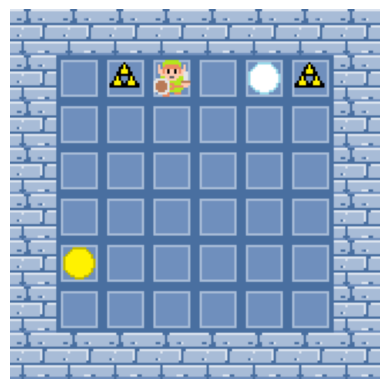

In [7]:
#se puede repetir la celda para ver el funcionamiento del juego
w='w'
s='s'
a='a'
d='d'

mover(mapa_simbolo,w)
graficar_mapa_imagen(mapa_simbolo)

# **En el codigo anterior el movimiento es wsad , luego es 0123**

Se toma el caso de una sola caja para evaluar las virtudes y desventajas del método simulated annealing

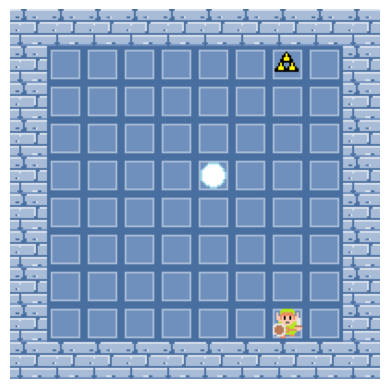

In [8]:
#se optimiza mediante simulated annealing
#se redefine el codigo, se considera una caja y la distancia manhattan del personaje a la caja y la distancia de la caja a la meta
#el codigo almacena las desiciones tomadas, en donde se elije por defecto la opción que minimice la heuristica con una probabilidad de
#tomar una mala decision


mapa_original= [
    ['/', '/', '/', '/', '/', '/', '/', '/', '/', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', 'M', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', '/', '/', '/', '/', '/', '/', '/', '/', '/']
]

#se define la ubicación del personaje, en python el extremo superior izquierdo es el (0,0)
posicion_inicial_personaje_fila=8
posicion_inicial_personaje_columna=7
#se define la ubicación de la caja
caja_1_p=(4,5)

#caja_1_y=5
#caja_2_x=2
#caja_2_y=7

#se pasa a un array
mapa_original=np.array(mapa_original)
mapa_simbolo= np.array(mapa_original)


#se añade el personaje
mapa_simbolo[posicion_inicial_personaje_fila,posicion_inicial_personaje_columna]='P'
#se añade la caja
mapa_simbolo[caja_1_p[0],caja_1_p[1]]='X'

#se obtiene las dimensiones del mapa
filas,columnas= np.shape(mapa_simbolo)

#Se crea la imagen del mapa en negro con los tres canales
#cada sprite es 20x20 pixeles, por eso se multiplica las filas y columnas por 20
imagen_mapa= np.zeros((filas*20,columnas*20, 3))
#se añade los sprites correspondientes a cada pixel
for i in range(filas):
  for j in range(columnas):
    if mapa_original[i][j] == '/':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_pared
    if mapa_original[i][j] == ' ':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_suelo
    if mapa_original[i][j] == 'M':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_marca
    if mapa_simbolo[i][j] == 'X':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_caja
    if mapa_simbolo[i][j] == 'P':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_personaje

plt.axis("off")
plt.imshow(imagen_mapa)
plt.show()

In [9]:
#Se define la función de movimiento, es similar a la función anterior, se saca los mensajes y el movimiento es 0,1,2,3
def graficar_mapa_imagen(mapa_simbolo):
  filas,columnas= np.shape(mapa_simbolo)
  #Se crea la imagen del mapa
  imagen_mapa= np.zeros((filas*20,columnas*20, 3))
  for i in range(filas):
    for j in range(columnas):
      if mapa_simbolo[i][j] == 'P':
        imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_personaje
      if mapa_original[i][j] == '/':
        imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_pared
      if mapa_original[i][j] == ' ':
        imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_suelo
      if mapa_original[i][j] == 'M':
        imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_marca
      if mapa_simbolo[i][j] == 'X':
        imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_caja
      if mapa_simbolo[i][j] == 'X' and mapa_original[i][j] =='M':
        imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_caja_activada
      if mapa_simbolo[i][j] == 'P':
        imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_personaje
  #plt.axis("off")
  #plt.imshow(imagen_mapa)
  #plt.show()

  return imagen_mapa
#----------------------------------------------------------------------

#----------------------------------------------------------------------
#Se define el significado de los símbolos
personaje='P'
piso=' '
caja='X'
caja_activada='A'
marca='M'
pared='/'
#----------------------------------------------------------------------
#se define los movimientos
arriba=0
abajo=1
izquierda=2
derecha=3
#----------------------------------------------------------------------
#conteo de cajas
cantidad_cajas=np.sum(mapa_simbolo == caja)
#conteno de marca
cantidad_marcas=np.sum(mapa_original == marca)
#se crea el contador de cajas en el lugar correcto
def cantidad_cajas_activadas(mapa_simbolo):
  #se crea el contador de cajas en el lugar correcto
  posicion_caja = np.argwhere(mapa_simbolo == caja)
  posicion_marca = np.argwhere(mapa_original == marca)
  #se crea la posición de las cajas y marcas, se agrupan en un tuple por fila y se comparan
  conjunto_caja = set(map(tuple, posicion_caja))
  conjunto_fila = set(map(tuple, posicion_marca))
  cantidad_cajas_activadas = conjunto_caja.intersection(conjunto_fila)
  #el código devuelve los elementos en comun, uno quiere la cantidad
  return len(cantidad_cajas_activadas)


def mover(mapa_simbolo1,direccion):

  mapa_simbolo=mapa_simbolo1.copy()
  #--------------------------------------------------------------------------------------------------------------------------
  #se define la posición del personaje, el personaje debe estar una vez solamente en el tablero
  posicion = np.argwhere(mapa_simbolo == personaje)
  x, y = posicion[0]
  #-------------------------------------------------------------------------------------------------------------------------
  #se establece cada dirección posible
  if direccion == arriba:
  #se calcula la nueva posición
    nueva_x = x - 1
  #se verifica si se encuentra con una pared
  #se mueve si la proxima celda es un suelo o marca
    if mapa_simbolo[nueva_x, y] == piso or mapa_simbolo[nueva_x, y] == marca:
  #se mueve el personaje
      mapa_simbolo[x, y] = mapa_original[x,y] #donde estaba pasa a ser el piso o marca
      mapa_simbolo[nueva_x, y] = personaje
    #si se encuentra con una caja, la mueve si no hay una pared o caja en la celda objetivo
    if mapa_simbolo[nueva_x, y] == caja:

    # se mueve la caja
      if mapa_simbolo[nueva_x-1, y] == piso or mapa_simbolo[nueva_x-1, y] == marca:
        mapa_simbolo[x, y] =mapa_original[x,y]
        mapa_simbolo[nueva_x, y] = personaje
        mapa_simbolo[nueva_x-1, y] = caja


  #--------------------------------------------------------------------------------------------------------------------------
  # se repite el codigo para las demas direcciones, siendo análogo el procedimiento


  if direccion == abajo:
  # Se calcula la nueva posición
    nueva_x = x + 1
  #se verifica si se encuentra con una pared
  #se mueve si la proxima celda es un suelo o marca
    if mapa_simbolo[nueva_x, y] == piso or mapa_simbolo[nueva_x, y] == marca:
  #se mueve el personaje
      mapa_simbolo[x, y] = mapa_original[x,y] #donde estaba pasa a ser el piso o marca
      mapa_simbolo[nueva_x, y] = personaje
    #si se encuentra con una caja, la mueve si no hay una pared o caja en la celda objetivo
    if mapa_simbolo[nueva_x, y] == caja:

    # se mueve la caja
      if mapa_simbolo[nueva_x+1, y] == piso or mapa_simbolo[nueva_x+1, y] == marca:
        mapa_simbolo[x, y] =mapa_original[x,y]
        mapa_simbolo[nueva_x, y] = personaje
        mapa_simbolo[nueva_x+1, y] = caja

  #--------------------------------------------------------------------------------------------------------------------------
  if direccion == izquierda:
  # Se calcula la nueva posición
    nueva_y = y - 1
  #se verifica si se encuentra con una pared
  #se mueve si la proxima celda es un suelo o marca
    if mapa_simbolo[x,nueva_y] == piso or mapa_simbolo[x,nueva_y] == marca:
  #se mueve el personaje
      mapa_simbolo[x, y] = mapa_original[x,y] #donde estaba pasa a ser el piso o marca
      mapa_simbolo[x,nueva_y] = personaje
    #si se encuentra con una caja, la mueve si no hay una pared o caja en la celda objetivo
    if mapa_simbolo[x,nueva_y] == caja:

    # se mueve la caja
      if mapa_simbolo[x,nueva_y-1] == piso or mapa_simbolo[x,nueva_y-1] == marca:
        mapa_simbolo[x, y] =mapa_original[x,y]
        mapa_simbolo[x,nueva_y] = personaje
        mapa_simbolo[x,nueva_y-1] = caja

  #--------------------------------------------------------------------------------------------------------------------------
  if direccion == derecha:
  # Se calcula la nueva posición
    nueva_y = y + 1
  #se verifica si se encuentra con una pared
  #se mueve si la proxima celda es un suelo o marca
    if mapa_simbolo[x,nueva_y] == piso or mapa_simbolo[x,nueva_y] == marca:
  #se mueve el personaje
      mapa_simbolo[x, y] = mapa_original[x,y] #donde estaba pasa a ser el piso o marca
      mapa_simbolo[x,nueva_y] = personaje
    #si se encuentra con una caja, la mueve si no hay una pared o caja en la celda objetivo
    if mapa_simbolo[x,nueva_y] == caja:

    # se mueve la caja
      if mapa_simbolo[x,nueva_y+1] == piso or mapa_simbolo[x,nueva_y+1] == marca:
        mapa_simbolo[x, y] =mapa_original[x,y]
        mapa_simbolo[x,nueva_y] = personaje
        mapa_simbolo[x,nueva_y+1] = caja


  #---------------------------------------------------------------------------------------------------------------------------
  # se comprueba la condición ganadora y se indica si se cumple
  puntos_avances=cantidad_cajas_activadas(mapa_simbolo)
  #print(f"Progreso:'{puntos_avances}'/'{cantidad_cajas}'")



  indice_P = np.where(mapa_simbolo =='P')
  indice_X = np.where(mapa_simbolo =='X')
  indice_M = np.where(mapa_original =='M')
  distancia_P_X = abs(indice_P[0][0] - indice_X[0][0]) + abs(indice_P[1][0] - indice_X[1][0])
  distancia_M_X = abs(indice_M[0][0] - indice_X[0][0]) + abs(indice_M[1][0] - indice_X[1][0])
  heuristica1=distancia_P_X+distancia_M_X
  #---------------------------------------------------------------------------------------------------------------------------
  return heuristica1, mapa_simbolo,puntos_avances

La siguiente celda es para corroborar el estado inicial y ejecutar un movimiento, para testear

In [10]:
mapa_simbolo_iteraciones=mapa_simbolo.copy()
print(mapa_simbolo_iteraciones)

P,mapa_simbolo_iteraciones,condicion_ganadora=mover(mapa_simbolo_iteraciones,0)
print(mapa_simbolo_iteraciones)

[['/' '/' '/' '/' '/' '/' '/' '/' '/' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' 'M' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' 'X' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' 'P' ' ' '/']
 ['/' '/' '/' '/' '/' '/' '/' '/' '/' '/']]
[['/' '/' '/' '/' '/' '/' '/' '/' '/' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' 'M' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' 'X' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' 'P' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' '/' '/' '/' '/' '/' '/' '/' '/' '/']]


La funcion devuelve:
-La función objetivo, se le llama heuristica pero estrictamente no es eso , no se modifica su nombre para no ocacionar errores en la implementación del código.
-El mapa simbolo nuevo
-el puntaje que mide la condicion ganadora, en este caso 1 es la condicion ganadora

# **Se define la función que permite guardar el zip con las imagenes de los movimientos, todas las variantes usan el mismo código, por eso si se desea guardar los pasos ejecutar esta celda una vez realizada la simulación correspondiente**

In [11]:
#esta celda se hizo mediante chat gpt, se comprobó el funcionamiento correcto

import cv2
import numpy as np
import os
import shutil
from google.colab import files


def guardar_imagen(movimientos_tomados):

  output_dir = 'output_images'  # Directorio para guardar las imágenes
  zip_filename = 'images.zip'  # Nombre del archivo ZIP
  os.makedirs(output_dir, exist_ok=True)
  mapa_simbolo_iteraciones=mapa_simbolo.copy()
  #cuando se guarda las imagenes se toma los movimientos realizados, por eso se incerta al principio un movimiento no valido para que la animación comience en la posición inicial
  nuevo_elemento = np.array([5])
  # Se Concatena el nuevo elemento
  movimientos_tomados_V1 = np.concatenate((nuevo_elemento, movimientos_tomados))
  for i in range(len(movimientos_tomados_V1)):

      B,A,condicion_ganadora=mover(mapa_simbolo_iteraciones,movimientos_tomados_V1[i])

      mapa_simbolo_iteraciones=A
      imagen=graficar_mapa_imagen(A)
      imagen = (255 * imagen).astype(np.uint8)

      filename = os.path.join(output_dir, f'imagen{str(i+1).zfill(2)}.jpg')

    # Guardar la imagen en formato JPG
      cv2.imwrite(filename, imagen)

  # Crear un archivo ZIP con las imágenes
  shutil.make_archive(zip_filename.replace('.zip', ''), 'zip', output_dir)
  # Descargar el archivo ZIP
  files.download(zip_filename)

  return

# **Se implementa el método Simulated Annealing**

EL siguiente codigo es un algoritmo de busqueda iterativo solo con la condicion de mejora con la función objetivo Manhattan, se acepta solamente la mejor opción

[['/' '/' '/' '/' '/' '/' '/' '/' '/' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' 'M' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' 'X' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' 'P' ' ' '/']
 ['/' '/' '/' '/' '/' '/' '/' '/' '/' '/']]
[['/' '/' '/' '/' '/' '/' '/' '/' '/' '/']
 ['/' ' ' ' ' ' ' ' ' 'X' ' ' 'M' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' 'P' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' '/' '/' '/' '/' '/' '/' '/' '/' '/']]


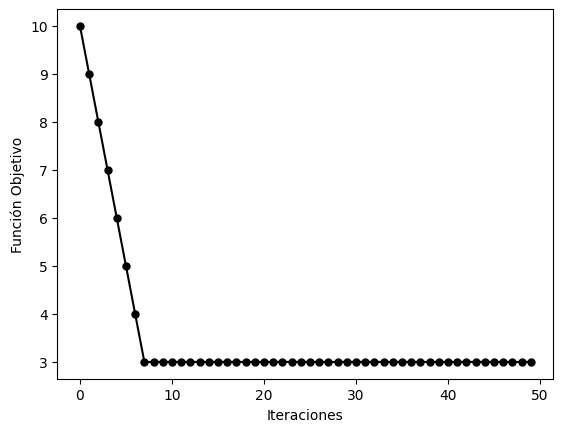

In [ ]:
#Al final se hace un print del estado inicial y final

iteraciones=50
mapa_simbolo_iteraciones=mapa_simbolo.copy()
puntaje_movimiento=np.zeros(4)

#se llena de movimientos invalidos(5), para que se ejecute solo los movimientos tomados
movimientos_tomados=np.full(iteraciones, 5)
heuristica=np.zeros(iteraciones)

print(mapa_simbolo)

for i in range(iteraciones):
  for j in range(4):
    puntaje_movimiento[j],A,condicion_ganadora=mover(mapa_simbolo_iteraciones,j)
  mejor_movimiento = np.where(puntaje_movimiento == np.min(puntaje_movimiento))[0]
  indice_mejor_movimiento= np.random.choice(mejor_movimiento)

  movimientos_tomados[i]=indice_mejor_movimiento
  B,A,condicion_ganadora=mover(mapa_simbolo_iteraciones,indice_mejor_movimiento)
  mapa_simbolo_iteraciones=A
  heuristica[i]=B

  if condicion_ganadora == 1:
    print("¡Ganaste!")
    break

print(mapa_simbolo_iteraciones)


plt.plot(heuristica, 'ko-', markersize=5)
plt.xlabel('Iteraciones')
plt.ylabel('Función Objetivo')
plt.show()

In [ ]:
#para hacer un check
movimientos_tomados

array([0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

[['/' '/' '/' '/' '/' '/' '/' '/' '/' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' 'M' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' '/' '/' '/' '/' '/' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' 'X' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' 'P' ' ' '/']
 ['/' '/' '/' '/' '/' '/' '/' '/' '/' '/']]
[['/' '/' '/' '/' '/' '/' '/' '/' '/' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' 'M' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' '/' '/' '/' '/' '/' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' 'X' 'P' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' '/' '/' '/' '/' '/' '/' '/' '/' '/']]


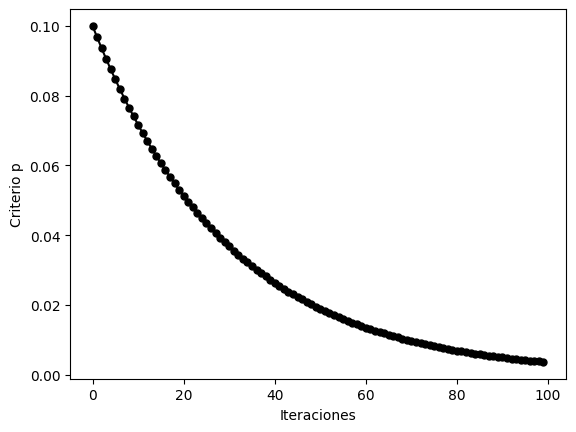

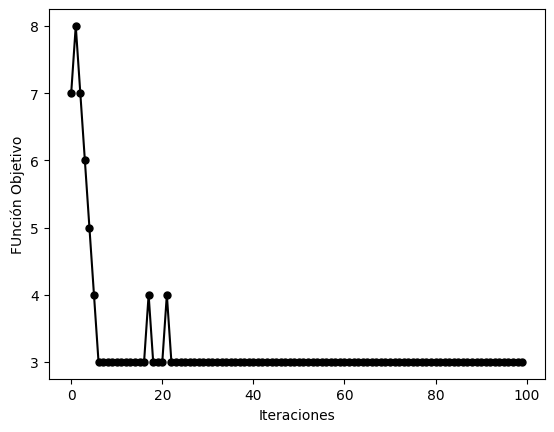

Tiempo de ejecución: 0.5499 segundos


In [ ]:
#se añade la medicón del tiempo de ejecución
import math
import time

inicio = time.time()


iteraciones=100
mapa_simbolo_iteraciones=mapa_simbolo.copy()
puntaje_movimiento=np.zeros(4)
movimientos_tomados=np.full(iteraciones, 5)
heuristica=np.zeros(iteraciones)

valor_p=np.zeros(iteraciones)
print(mapa_simbolo)
p0=0.1
tau=30

for i in range(iteraciones):

  b1,A,condicion_ganadora=mover(mapa_simbolo_iteraciones,0)
  b2,A,condicion_ganadora=mover(mapa_simbolo_iteraciones,1)
  b3,A,condicion_ganadora=mover(mapa_simbolo_iteraciones,2)
  b4,A,condicion_ganadora=mover(mapa_simbolo_iteraciones,3)

  puntaje_movimiento[0]=b1
  puntaje_movimiento[1]=b2
  puntaje_movimiento[2]=b3
  puntaje_movimiento[3]=b4
#se calcular el criterio de aceptación
  criterio=p0 * np.exp(-i / tau)
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  valor_p[i]=criterio
  ñ=abs(np.random.randn())
  if ñ< criterio:
    mejor_movimiento = np.where(puntaje_movimiento == np.max(puntaje_movimiento))[0]
    indice_mejor_movimiento= np.random.choice(mejor_movimiento)

  else:
    mejor_movimiento = np.where(puntaje_movimiento == np.min(puntaje_movimiento))[0]
    indice_mejor_movimiento= np.random.choice(mejor_movimiento)

  movimientos_tomados[i]=indice_mejor_movimiento
  B,A,condicion_ganadora=mover(mapa_simbolo_iteraciones,indice_mejor_movimiento)
  mapa_simbolo_iteraciones=A.copy()
  heuristica[i]=B

  if condicion_ganadora == 1:
    print("¡Ganaste!")
    break

print(mapa_simbolo_iteraciones)

plt.plot(valor_p, 'ko-', markersize=5)
plt.xlabel('Iteraciones')
plt.ylabel('Criterio p')
plt.show()

plt.plot(heuristica, 'ko-', markersize=5)
plt.xlabel('Iteraciones')
plt.ylabel('FUnción Objetivo')
plt.show()


fin = time.time()
duracion = fin - inicio
print(f"Tiempo de ejecución: {duracion:.4f} segundos")

In [ ]:
guardar_imagen(movimientos_tomados)

NameError: name 'guardar_imagen' is not defined

# **Se implementa la regla "Diagonal cero" se realiza con un if en el cálculo de las distancias**

In [ ]:
#conteo de cajas
cantidad_cajas=np.sum(mapa_simbolo == caja)
#conteno de marca
cantidad_marcas=np.sum(mapa_original == marca)
#se crea el contador de cajas en el lugar correcto
def cantidad_cajas_activadas(mapa_simbolo):
  #se crea el contador de cajas en el lugar correcto
  posicion_caja = np.argwhere(mapa_simbolo == caja)
  posicion_marca = np.argwhere(mapa_original == marca)
  #se crea la posición de las cajas y marcas, se agrupan en un tuple por fila y se comparan
  conjunto_caja = set(map(tuple, posicion_caja))
  conjunto_fila = set(map(tuple, posicion_marca))
  cantidad_cajas_activadas = conjunto_caja.intersection(conjunto_fila)
  #el código devuelve los elementos en comun, uno quiere la cantidad
  return len(cantidad_cajas_activadas)


def mover_d0(mapa_simbolo1,direccion):

  mapa_simbolo=mapa_simbolo1.copy()
  #--------------------------------------------------------------------------------------------------------------------------
  #se define la posición del personaje, el personaje debe estar una vez solamente en el tablero
  posicion = np.argwhere(mapa_simbolo == personaje)
  x, y = posicion[0]
  #-------------------------------------------------------------------------------------------------------------------------
  #se establece cada dirección posible
  if direccion == arriba:
  #se calcula la nueva posición
    nueva_x = x - 1
  #se verifica si se encuentra con una pared
  #se mueve si la proxima celda es un suelo o marca
    if mapa_simbolo[nueva_x, y] == piso or mapa_simbolo[nueva_x, y] == marca:
  #se mueve el personaje
      mapa_simbolo[x, y] = mapa_original[x,y] #donde estaba pasa a ser el piso o marca
      mapa_simbolo[nueva_x, y] = personaje
    #si se encuentra con una caja, la mueve si no hay una pared o caja en la celda objetivo
    if mapa_simbolo[nueva_x, y] == caja:

    # se mueve la caja
      if mapa_simbolo[nueva_x-1, y] == piso or mapa_simbolo[nueva_x-1, y] == marca:
        mapa_simbolo[x, y] =mapa_original[x,y]
        mapa_simbolo[nueva_x, y] = personaje
        mapa_simbolo[nueva_x-1, y] = caja


  #--------------------------------------------------------------------------------------------------------------------------
  # se repite el codigo para las demas direcciones, siendo análogo el procedimiento


  if direccion == abajo:
  # Se calcula la nueva posición
    nueva_x = x + 1
  #se verifica si se encuentra con una pared
  #se mueve si la proxima celda es un suelo o marca
    if mapa_simbolo[nueva_x, y] == piso or mapa_simbolo[nueva_x, y] == marca:
  #se mueve el personaje
      mapa_simbolo[x, y] = mapa_original[x,y] #donde estaba pasa a ser el piso o marca
      mapa_simbolo[nueva_x, y] = personaje
    #si se encuentra con una caja, la mueve si no hay una pared o caja en la celda objetivo
    if mapa_simbolo[nueva_x, y] == caja:

    # se mueve la caja
      if mapa_simbolo[nueva_x+1, y] == piso or mapa_simbolo[nueva_x+1, y] == marca:
        mapa_simbolo[x, y] =mapa_original[x,y]
        mapa_simbolo[nueva_x, y] = personaje
        mapa_simbolo[nueva_x+1, y] = caja

  #--------------------------------------------------------------------------------------------------------------------------
  if direccion == izquierda:
  # Se calcula la nueva posición
    nueva_y = y - 1
  #se verifica si se encuentra con una pared
  #se mueve si la proxima celda es un suelo o marca
    if mapa_simbolo[x,nueva_y] == piso or mapa_simbolo[x,nueva_y] == marca:
  #se mueve el personaje
      mapa_simbolo[x, y] = mapa_original[x,y] #donde estaba pasa a ser el piso o marca
      mapa_simbolo[x,nueva_y] = personaje
    #si se encuentra con una caja, la mueve si no hay una pared o caja en la celda objetivo
    if mapa_simbolo[x,nueva_y] == caja:

    # se mueve la caja
      if mapa_simbolo[x,nueva_y-1] == piso or mapa_simbolo[x,nueva_y-1] == marca:
        mapa_simbolo[x, y] =mapa_original[x,y]
        mapa_simbolo[x,nueva_y] = personaje
        mapa_simbolo[x,nueva_y-1] = caja

  #--------------------------------------------------------------------------------------------------------------------------
  if direccion == derecha:
  # Se calcula la nueva posición
    nueva_y = y + 1
  #se verifica si se encuentra con una pared
  #se mueve si la proxima celda es un suelo o marca
    if mapa_simbolo[x,nueva_y] == piso or mapa_simbolo[x,nueva_y] == marca:
  #se mueve el personaje
      mapa_simbolo[x, y] = mapa_original[x,y] #donde estaba pasa a ser el piso o marca
      mapa_simbolo[x,nueva_y] = personaje
    #si se encuentra con una caja, la mueve si no hay una pared o caja en la celda objetivo
    if mapa_simbolo[x,nueva_y] == caja:

    # se mueve la caja
      if mapa_simbolo[x,nueva_y+1] == piso or mapa_simbolo[x,nueva_y+1] == marca:
        mapa_simbolo[x, y] =mapa_original[x,y]
        mapa_simbolo[x,nueva_y] = personaje
        mapa_simbolo[x,nueva_y+1] = caja


  #---------------------------------------------------------------------------------------------------------------------------
  # se comprueba la condición ganadora y se indica si se cumple
  puntos_avances=cantidad_cajas_activadas(mapa_simbolo)



  indice_P = np.where(mapa_simbolo =='P')
  indice_X = np.where(mapa_simbolo =='X')
  indice_M = np.where(mapa_original =='M')

  Dpx_fila=abs(indice_P[0][0] - indice_X[0][0])
  Dpx_columna=abs(indice_P[1][0] - indice_X[1][0])
  distancia_P_X = Dpx_fila + Dpx_columna

  if Dpx_fila==1 and Dpx_columna==1:
    distancia_P_X=1

  distancia_M_X = abs(indice_M[0][0] - indice_X[0][0]) + abs(indice_M[1][0] - indice_X[1][0])


  heuristica1=distancia_P_X+distancia_M_X
  #---------------------------------------------------------------------------------------------------------------------------
  return heuristica1, mapa_simbolo,puntos_avances

[['/' '/' '/' '/' '/' '/' '/' '/' '/' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' 'M' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' 'X' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' 'P' ' ' '/']
 ['/' '/' '/' '/' '/' '/' '/' '/' '/' '/']]
¡Ganaste!
[['/' '/' '/' '/' '/' '/' '/' '/' '/' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' 'P' 'X' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' '/' '/' '/' '/' '/' '/' '/' '/' '/']]


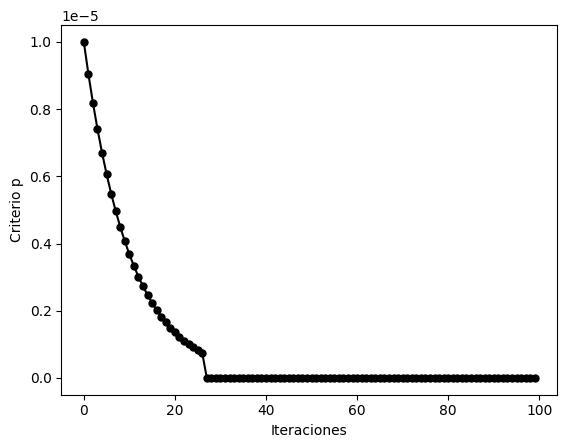

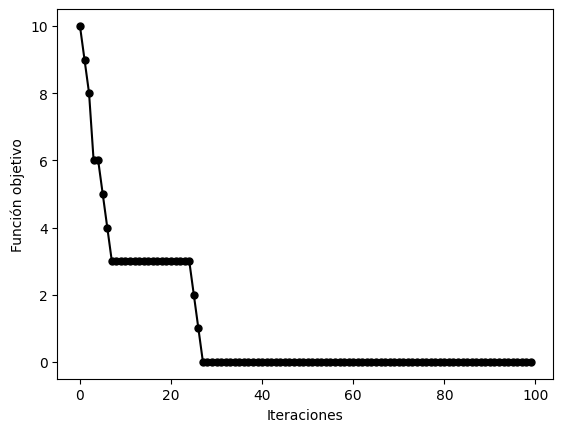

In [ ]:
#se repite el código del caso anterior con la nueva función objetivo
import math

iteraciones=100
mapa_simbolo_iteraciones=mapa_simbolo.copy()
puntaje_movimiento=np.zeros(4)
movimientos_tomados=np.full(iteraciones, 5)
heuristica=np.zeros(iteraciones)

valor_p=np.zeros(iteraciones)
print(mapa_simbolo)
p0=0.00001
tau=10

for i in range(iteraciones):

  b1,A,condicion_ganadora=mover_d0(mapa_simbolo_iteraciones,0)
  b2,A,condicion_ganadora=mover_d0(mapa_simbolo_iteraciones,1)
  b3,A,condicion_ganadora=mover_d0(mapa_simbolo_iteraciones,2)
  b4,A,condicion_ganadora=mover_d0(mapa_simbolo_iteraciones,3)

  puntaje_movimiento[0]=b1
  puntaje_movimiento[1]=b2
  puntaje_movimiento[2]=b3
  puntaje_movimiento[3]=b4
#se calcular el criterio de aceptación
  criterio=p0 * np.exp(-i / tau)
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  valor_p[i]=criterio
  ñ=abs(np.random.randn())
  if ñ< criterio:
    mejor_movimiento = np.where(puntaje_movimiento == np.max(puntaje_movimiento))[0]
    indice_mejor_movimiento= np.random.choice(mejor_movimiento)

  else:
    mejor_movimiento = np.where(puntaje_movimiento == np.min(puntaje_movimiento))[0]
    indice_mejor_movimiento= np.random.choice(mejor_movimiento)

  movimientos_tomados[i]=indice_mejor_movimiento
  B,A,condicion_ganadora=mover_d0(mapa_simbolo_iteraciones,indice_mejor_movimiento)
  mapa_simbolo_iteraciones=A.copy()
  heuristica[i]=B

  if condicion_ganadora == 1:
    print("¡Ganaste!")
    break

print(mapa_simbolo_iteraciones)

plt.plot(valor_p, 'ko-', markersize=5)
plt.xlabel('Iteraciones')
plt.ylabel('Criterio p')
plt.show()

plt.plot(heuristica, 'ko-', markersize=5)
plt.xlabel('Iteraciones')
plt.ylabel('Función objetivo')
plt.show()

# **Se cambia el nivel para bloquear el camino**

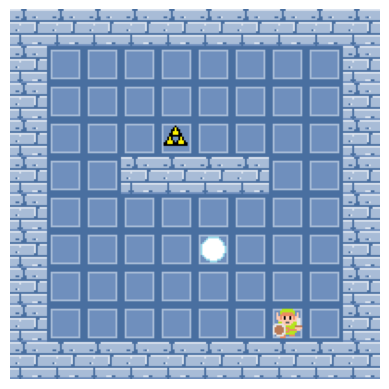

In [ ]:

mapa_original= [
    ['/', '/', '/', '/', '/', '/', '/', '/', '/', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', ' ', ' ', ' ', 'M', ' ', ' ', ' ', ' ', '/'],
    ['/', ' ', ' ', '/', '/', '/', '/', ' ', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', '/', '/', '/', '/', '/', '/', '/', '/', '/']
]

#se define la ubicación del personaje, en python el extremo superior izquierdo es el (0,0)
posicion_inicial_personaje_fila=8
posicion_inicial_personaje_columna=7
#se define la ubicación de las cajas
caja_1_p=(6,5)

#caja_1_y=5
#caja_2_x=2
#caja_2_y=7

#se pasa a un array
mapa_original=np.array(mapa_original)
mapa_simbolo= np.array(mapa_original)


#se añade el personaje
mapa_simbolo[posicion_inicial_personaje_fila,posicion_inicial_personaje_columna]='P'
#se añade las cajas
mapa_simbolo[caja_1_p[0],caja_1_p[1]]='X'

#se obtiene las dimensiones del mapa
filas,columnas= np.shape(mapa_simbolo)

#Se crea la imagen del mapa en negro con los tres canales
#cada sprite es 20x20 pixeles, por eso se multiplica las filas y columnas por 20
imagen_mapa= np.zeros((filas*20,columnas*20, 3))
#se añade los sprites correspondientes a cada pixel
for i in range(filas):
  for j in range(columnas):
    if mapa_original[i][j] == '/':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_pared
    if mapa_original[i][j] == ' ':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_suelo
    if mapa_original[i][j] == 'M':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_marca
    if mapa_simbolo[i][j] == 'X':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_caja
    if mapa_simbolo[i][j] == 'P':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_personaje

plt.axis("off")
plt.imshow(imagen_mapa)
plt.show()

In [ ]:
import math

iteraciones=100
mapa_simbolo_iteraciones=mapa_simbolo.copy()
puntaje_movimiento=np.zeros(4)
movimientos_tomados=np.full(iteraciones, 5)
heuristica=np.zeros(iteraciones)

valor_p=np.zeros(iteraciones)
print(mapa_simbolo)
p0=0.3
tau=30

for i in range(iteraciones):
  for j in range(4):
    puntaje_movimiento[j],A,condicion_ganadora=mover_d0(mapa_simbolo_iteraciones,j)

#se calcular el criterio de aceptación
  criterio=p0 * np.exp(-i / tau)
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  valor_p[i]=criterio
  ñ=abs(np.random.randn())
  if ñ< criterio:
    mejor_movimiento = np.where(puntaje_movimiento == np.max(puntaje_movimiento))[0]
    indice_mejor_movimiento= np.random.choice(mejor_movimiento)

  else:
    mejor_movimiento = np.where(puntaje_movimiento == np.min(puntaje_movimiento))[0]
    indice_mejor_movimiento= np.random.choice(mejor_movimiento)

  movimientos_tomados[i]=indice_mejor_movimiento
  B,A,condicion_ganadora=mover_d0(mapa_simbolo_iteraciones,indice_mejor_movimiento)
  mapa_simbolo_iteraciones=A.copy()
  heuristica[i]=B

  if condicion_ganadora == 1:
    print("¡Ganaste!")
    break

print(mapa_simbolo_iteraciones)

plt.plot(valor_p, 'ko-', markersize=5)
plt.xlabel('Iteraciones')
plt.ylabel('Criterio p')
plt.show()

plt.plot(heuristica, 'ko-', markersize=5)
plt.xlabel('Iteraciones')
plt.ylabel('Función objetivo')
plt.show()

[['/' '/' '/' '/' '/' '/' '/' '/' '/' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' 'M' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' '/' '/' '/' '/' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' 'X' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' 'P' ' ' '/']
 ['/' '/' '/' '/' '/' '/' '/' '/' '/' '/']]


NameError: name 'mover_d0' is not defined

In [ ]:
import math

iteraciones=100
mapa_simbolo_iteraciones=mapa_simbolo.copy()
puntaje_movimiento=np.zeros(4)
movimientos_tomados=np.full(iteraciones, 5)
heuristica=np.zeros(iteraciones)

valor_p=np.zeros(iteraciones)
print(mapa_simbolo)
p0=0.3
tau=30

for q in range(50):
  mapa_simbolo_iteraciones=mapa_simbolo.copy()
  puntaje_movimiento=np.zeros(4)
  movimientos_tomados=np.full(iteraciones, 5)
  heuristica=np.zeros(iteraciones)
  valor_p=np.zeros(iteraciones)



  for i in range(iteraciones):
    for j in range(4):
      puntaje_movimiento[j],A,condicion_ganadora=mover_d0(mapa_simbolo_iteraciones,j)

#se calcular el criterio de aceptación
    criterio=p0 * np.exp(-i / tau)
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
    valor_p[i]=criterio
    ñ=abs(np.random.randn())
    if ñ< criterio:
      mejor_movimiento = np.where(puntaje_movimiento == np.max(puntaje_movimiento))[0]
      indice_mejor_movimiento= np.random.choice(mejor_movimiento)

    else:
      mejor_movimiento = np.where(puntaje_movimiento == np.min(puntaje_movimiento))[0]
      indice_mejor_movimiento= np.random.choice(mejor_movimiento)

    movimientos_tomados[i]=indice_mejor_movimiento
    B,A,condicion_ganadora=mover_d0(mapa_simbolo_iteraciones,indice_mejor_movimiento)
    mapa_simbolo_iteraciones=A.copy()
    heuristica[i]=B

    if condicion_ganadora == 1:
      print("¡Ganaste!")
      break

  if condicion_ganadora == 1:
      print("¡Ganaste!")
      break

print(q)
print(mapa_simbolo_iteraciones)

plt.plot(valor_p, 'ko-', markersize=5)
plt.xlabel('Iteraciones')
plt.ylabel('Criterio p')
plt.show()

plt.plot(heuristica, 'ko-', markersize=5)
plt.xlabel('Iteraciones')
plt.ylabel('funcion objetivo')
plt.show()

In [ ]:
movimientos_tomados

Se repite el codigo, ahora se añade un contador de escenarios ganados y se cuenta cuantos movimientos le tomó

In [ ]:
import math

iteraciones=100
mapa_simbolo_iteraciones=mapa_simbolo.copy()
puntaje_movimiento=np.zeros(4)
movimientos_tomados=np.full(iteraciones, 5)
heuristica=np.zeros(iteraciones)

valor_p=np.zeros(iteraciones)
print(mapa_simbolo)
p0=0.6
tau=30

contador=0

intentos=5000
cantidad_movimientos_ganadores=np.zeros(intentos)
for q in range(intentos):
  mapa_simbolo_iteraciones=mapa_simbolo.copy()
  puntaje_movimiento=np.zeros(4)
  movimientos_tomados=np.full(iteraciones, 5)
  heuristica=np.zeros(iteraciones)
  valor_p=np.zeros(iteraciones)



  for i in range(iteraciones):
    for j in range(4):
      puntaje_movimiento[j],A,condicion_ganadora=mover(mapa_simbolo_iteraciones,j)

#se calcular el criterio de aceptación
    criterio=p0 * np.exp(-i / tau)
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
    valor_p[i]=criterio
    ñ=abs(np.random.randn())
    if ñ< criterio:
      mejor_movimiento = np.where(puntaje_movimiento == np.max(puntaje_movimiento))[0]
      indice_mejor_movimiento= np.random.choice(mejor_movimiento)

    else:
      mejor_movimiento = np.where(puntaje_movimiento == np.min(puntaje_movimiento))[0]
      indice_mejor_movimiento= np.random.choice(mejor_movimiento)

    movimientos_tomados[i]=indice_mejor_movimiento
    B,A,condicion_ganadora=mover(mapa_simbolo_iteraciones,indice_mejor_movimiento)
    mapa_simbolo_iteraciones=A.copy()
    heuristica[i]=B

    if condicion_ganadora == 1:
      contador=contador+1
      cantidad_movimientos_ganadores[q]=i
      break

cantidad_movimientos_ganadores = cantidad_movimientos_ganadores[cantidad_movimientos_ganadores != 0]
print(contador)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.histplot(cantidad_movimientos_ganadores, kde=True, bins=8, color='skyblue', edgecolor='black')

plt.xlabel('Número de movimientos')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.grid(True)
plt.show()

# **Se define el mapa para ser usado por los diferentes metodos**

La función para mover el personaje es la misma que el caso anterior, la diferencia es que como salida tiene el mapa actualizado, los movimientos se guardan por separado.

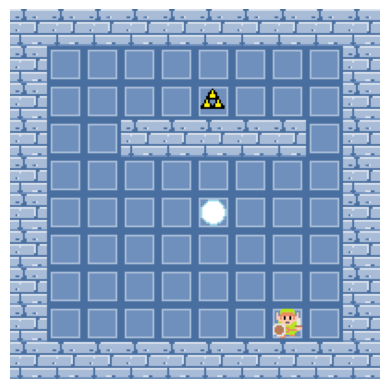

In [12]:
mapa_original= [
    ['/', '/', '/', '/', '/', '/', '/', '/', '/', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', 'M', ' ', ' ', ' ', '/'],
    ['/', ' ', ' ', '/', '/', '/', '/', '/', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', '/', '/', '/', '/', '/', '/', '/', '/', '/']
]

#se define la ubicación del personaje, en python el extremo superior izquierdo es el (0,0)
posicion_inicial_personaje_fila=8
posicion_inicial_personaje_columna=7
#se define la ubicación de las cajas
caja_1_p=(5,5)
#caja_2_p=(5,5)
#caja_1_y=5
#caja_2_x=2
#caja_2_y=7

#se pasa a un array
mapa_original=np.array(mapa_original)
mapa_simbolo= np.array(mapa_original)


#se añade el personaje
mapa_simbolo[posicion_inicial_personaje_fila,posicion_inicial_personaje_columna]='P'
#se añade las cajas
mapa_simbolo[caja_1_p[0],caja_1_p[1]]='X'
#mapa_simbolo[caja_2_p[0],caja_2_p[1]]='X'
#se obtiene las dimensiones del mapa
filas,columnas= np.shape(mapa_simbolo)

#Se crea la imagen del mapa en negro con los tres canales
#cada sprite es 20x20 pixeles, por eso se multiplica las filas y columnas por 20
imagen_mapa= np.zeros((filas*20,columnas*20, 3))
#se añade los sprites correspondientes a cada pixel
for i in range(filas):
  for j in range(columnas):
    if mapa_original[i][j] == '/':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_pared
    if mapa_original[i][j] == ' ':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_suelo
    if mapa_original[i][j] == 'M':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_marca
    if mapa_simbolo[i][j] == 'X':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_caja
    if mapa_simbolo[i][j] == 'P':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_personaje

plt.axis("off")
plt.imshow(imagen_mapa)
plt.show()


def graficar_mapa_imagen(mapa_simbolo):
  filas,columnas= np.shape(mapa_simbolo)
  #Se crea la imagen del mapa
  imagen_mapa= np.zeros((filas*20,columnas*20, 3))
  for i in range(filas):
    for j in range(columnas):
      if mapa_simbolo[i][j] == 'P':
        imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_personaje
      if mapa_original[i][j] == '/':
        imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_pared
      if mapa_original[i][j] == ' ':
        imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_suelo
      if mapa_original[i][j] == 'M':
        imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_marca
      if mapa_simbolo[i][j] == 'X':
        imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_caja
      if mapa_simbolo[i][j] == 'X' and mapa_original[i][j] =='M':
        imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_caja_activada
      if mapa_simbolo[i][j] == 'P':
        imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_personaje
  #plt.axis("off")
  #plt.imshow(imagen_mapa)
  #plt.show()

  return imagen_mapa
#----------------------------------------------------------------------

#----------------------------------------------------------------------
#Se define el significado de los símbolos
personaje='P'
piso=' '
caja='X'
caja_activada='A'
marca='M'
pared='/'
#----------------------------------------------------------------------
#se define los movimientos
arriba=0
abajo=1
izquierda=2
derecha=3
#----------------------------------------------------------------------
#conteo de cajas
cantidad_cajas=np.sum(mapa_simbolo == caja)
#conteno de marca
cantidad_marcas=np.sum(mapa_original == marca)
#se crea el contador de cajas en el lugar correcto
def cantidad_cajas_activadas(mapa_simbolo):
  #se crea el contador de cajas en el lugar correcto
  posicion_caja = np.argwhere(mapa_simbolo == caja)
  posicion_marca = np.argwhere(mapa_original == marca)
  #se crea la posición de las cajas y marcas, se agrupan en un tuple por fila y se comparan
  conjunto_caja = set(map(tuple, posicion_caja))
  conjunto_fila = set(map(tuple, posicion_marca))
  cantidad_cajas_activadas = conjunto_caja.intersection(conjunto_fila)
  #el código devuelve los elementos en comun, uno quiere la cantidad
  return len(cantidad_cajas_activadas)

def mover_metodos(mapa_simbolo1,direccion):

  mapa_simbolo=mapa_simbolo1.copy()
  #--------------------------------------------------------------------------------------------------------------------------
  #se define la posición del personaje, el personaje debe estar una vez solamente en el tablero
  posicion = np.argwhere(mapa_simbolo == personaje)
  x, y = posicion[0]
  #-------------------------------------------------------------------------------------------------------------------------
  #se establece cada dirección posible
  if direccion == arriba:
  #se calcula la nueva posición
    nueva_x = x - 1
  #se verifica si se encuentra con una pared
  #se mueve si la proxima celda es un suelo o marca
    if mapa_simbolo[nueva_x, y] == piso or mapa_simbolo[nueva_x, y] == marca:
  #se mueve el personaje
      mapa_simbolo[x, y] = mapa_original[x,y] #donde estaba pasa a ser el piso o marca
      mapa_simbolo[nueva_x, y] = personaje
    #si se encuentra con una caja, la mueve si no hay una pared o caja en la celda objetivo
    if mapa_simbolo[nueva_x, y] == caja:

    # se mueve la caja
      if mapa_simbolo[nueva_x-1, y] == piso or mapa_simbolo[nueva_x-1, y] == marca:
        mapa_simbolo[x, y] =mapa_original[x,y]
        mapa_simbolo[nueva_x, y] = personaje
        mapa_simbolo[nueva_x-1, y] = caja


  #--------------------------------------------------------------------------------------------------------------------------
  # se repite el codigo para las demas direcciones, siendo análogo el procedimiento


  if direccion == abajo:
  # Se calcula la nueva posición
    nueva_x = x + 1
  #se verifica si se encuentra con una pared
  #se mueve si la proxima celda es un suelo o marca
    if mapa_simbolo[nueva_x, y] == piso or mapa_simbolo[nueva_x, y] == marca:
  #se mueve el personaje
      mapa_simbolo[x, y] = mapa_original[x,y] #donde estaba pasa a ser el piso o marca
      mapa_simbolo[nueva_x, y] = personaje
    #si se encuentra con una caja, la mueve si no hay una pared o caja en la celda objetivo
    if mapa_simbolo[nueva_x, y] == caja:

    # se mueve la caja
      if mapa_simbolo[nueva_x+1, y] == piso or mapa_simbolo[nueva_x+1, y] == marca:
        mapa_simbolo[x, y] =mapa_original[x,y]
        mapa_simbolo[nueva_x, y] = personaje
        mapa_simbolo[nueva_x+1, y] = caja

  #--------------------------------------------------------------------------------------------------------------------------
  if direccion == izquierda:
  # Se calcula la nueva posición
    nueva_y = y - 1
  #se verifica si se encuentra con una pared
  #se mueve si la proxima celda es un suelo o marca
    if mapa_simbolo[x,nueva_y] == piso or mapa_simbolo[x,nueva_y] == marca:
  #se mueve el personaje
      mapa_simbolo[x, y] = mapa_original[x,y] #donde estaba pasa a ser el piso o marca
      mapa_simbolo[x,nueva_y] = personaje
    #si se encuentra con una caja, la mueve si no hay una pared o caja en la celda objetivo
    if mapa_simbolo[x,nueva_y] == caja:

    # se mueve la caja
      if mapa_simbolo[x,nueva_y-1] == piso or mapa_simbolo[x,nueva_y-1] == marca:
        mapa_simbolo[x, y] =mapa_original[x,y]
        mapa_simbolo[x,nueva_y] = personaje
        mapa_simbolo[x,nueva_y-1] = caja

  #--------------------------------------------------------------------------------------------------------------------------
  if direccion == derecha:
  # Se calcula la nueva posición
    nueva_y = y + 1
  #se verifica si se encuentra con una pared
  #se mueve si la proxima celda es un suelo o marca
    if mapa_simbolo[x,nueva_y] == piso or mapa_simbolo[x,nueva_y] == marca:
  #se mueve el personaje
      mapa_simbolo[x, y] = mapa_original[x,y] #donde estaba pasa a ser el piso o marca
      mapa_simbolo[x,nueva_y] = personaje
    #si se encuentra con una caja, la mueve si no hay una pared o caja en la celda objetivo
    if mapa_simbolo[x,nueva_y] == caja:

    # se mueve la caja
      if mapa_simbolo[x,nueva_y+1] == piso or mapa_simbolo[x,nueva_y+1] == marca:
        mapa_simbolo[x, y] =mapa_original[x,y]
        mapa_simbolo[x,nueva_y] = personaje
        mapa_simbolo[x,nueva_y+1] = caja


  #---------------------------------------------------------------------------------------------------------------------------
  # se comprueba la condición ganadora y se indica si se cumple
  #puntos_avances=cantidad_cajas_activadas(mapa_simbolo)
  #if puntos_avances == cantidad_marcas:
  #  J=1
  #else: J=0

  #print(f"Progreso:'{puntos_avances}'/'{cantidad_cajas}'")
  #---------------------------------------------------------------------------------------------------------------------------
  return mapa_simbolo

# **Se cargan las librerias para los 4 métodos**

Puede haber librerias que se exploraron su utilización y luego no se usaron

In [13]:
from collections import deque
import time
import matplotlib.pyplot as plt
from collections import deque, defaultdict
from collections import deque, defaultdict, Counter

# **BFS**

In [ ]:
#por algun motivo la condcion ganadora antes definida no funciona en el codigo, se define una forma nueva para cumplir eso
def encontrar_indices(matriz, elemento):
    indices = []
    for i, fila in enumerate(matriz):
        for j, valor in enumerate(fila):
            if valor == elemento:
                indices.append((i, j))
    return indices

Se ejecuta el metodo, se obtiene el camino optimo (path)

In [ ]:
inicio = time.time()


mapa_simbolo_BFS=mapa_simbolo.copy()
movimientos= [0, 1, 2, 3]
# Cola para explorar los estados (el mapa actual y el camino)
queue = deque([(mapa_simbolo_BFS, [])])
# Se crea el conjunto de estados visitados, donde se lo guarda a los mapas como tupla de tuplas por su eficiencia
visited = set()
visited.add(tuple(map(tuple, mapa_simbolo_BFS)))
#se define la condicion ganadora
indices_ganador = set(encontrar_indices(mapa_original, 'M'))

while queue:
    #se obtiene el mapa de a cuerdo a la lista
    mapa_actual, path = queue.popleft()

    # se explora los movimientos
    for i in range(4):
        mapa_nuevo = mover_metodos(mapa_actual,movimientos[i])
        # Se pasa el estado actual a una tupla
        state = tuple(map(tuple, mapa_nuevo))
        d=movimientos[i]
        #se verifica si fue visitado
        if state not in visited:
            #si no fue visitado se añade al conjunto de estados visitados
            visited.add(state)
            queue.append((mapa_nuevo, path + [d])) #se añade a la lista y se actualiza el camino
        #se verifica la posicion de la caja
        indices_nuevo = set(encontrar_indices(mapa_nuevo, 'X'))
        #se verifica la condicion ganadora
        if indices_nuevo==indices_ganador:
         path=path + [d]
         break
    if indices_nuevo==indices_ganador:
      print("Solución encontrada")
      break

else:
    print("No se encontró solución")

final = time.time()
tiempo = final- inicio
print(f"Tiempo de ejecución: {tiempo} segundos")

Solución encontrada
Tiempo de ejecución: 1.1287846565246582 segundos


In [ ]:
print(path)
print(len(path))

[0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 3, 3, 3]
17


Se repite con la capacidad de guardar la longuitud de los caminos visitados, se añade un contador de estados expandidos

Solución encontrada


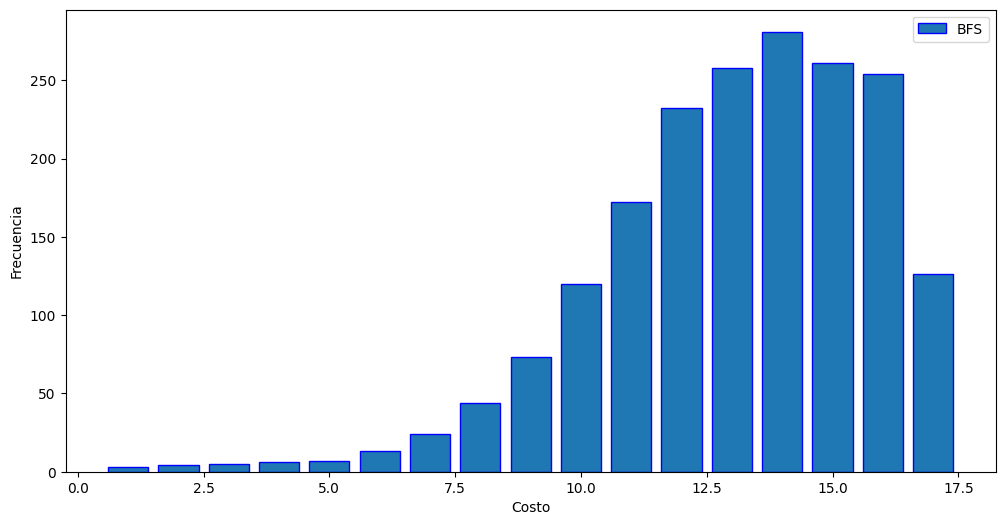

In [ ]:
mapa_simbolo_BFS = mapa_simbolo.copy()

movimientos = [0, 1, 2, 3]
queue = deque([(mapa_simbolo_BFS, [])])
visited = set()
visited.add(tuple(map(tuple, mapa_simbolo_BFS)))
indices_ganador = set(encontrar_indices(mapa_original, 'M'))

# Diccionario para almacenar la longitud del camino para cada estado visitado
longitud_caminos_BFS = {}
#el contador permite tener un numero de estados expandidos
contador_estados_expandidos = 0
while queue:
    mapa_actual, path = queue.popleft()

    contador_estados_expandidos= contador_estados_expandidos + 1
    for i in range(4):
        mapa_nuevo = mover_metodos(mapa_actual, movimientos[i])
        state = tuple(map(tuple, mapa_nuevo))
        d = movimientos[i]

        if state not in visited:
            visited.add(state)
            queue.append((mapa_nuevo, path + [d]))
            longitud_caminos_BFS[state] = len(path) + 1  # Se guarda la longitud del camino

        indices_nuevo = set(encontrar_indices(mapa_nuevo, 'X'))

        if indices_nuevo == indices_ganador:
            path = path + [d]
            break
    if indices_nuevo==indices_ganador:
      print("Solución encontrada")
      break
else:
    print("No se encontró solución")

#se define las frecuencias para longuitud de los estados
longitudes_BFS = list(longitud_caminos_BFS.values())
frecuencias_BFS = Counter(longitudes_BFS)
longitudes_unicas_BFS = sorted(frecuencias_BFS.keys())

plt.figure(figsize=(12, 6))
frecuencias_values_BFS = [frecuencias_BFS[longitud] for longitud in longitudes_unicas_BFS]
#se grafica el histograma
plt.bar(longitudes_unicas_BFS, frecuencias_values_BFS, edgecolor='blue', label='BFS')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.legend()
#plt.xlim(0,23)
#plt.ylim(0,200)
plt.show()


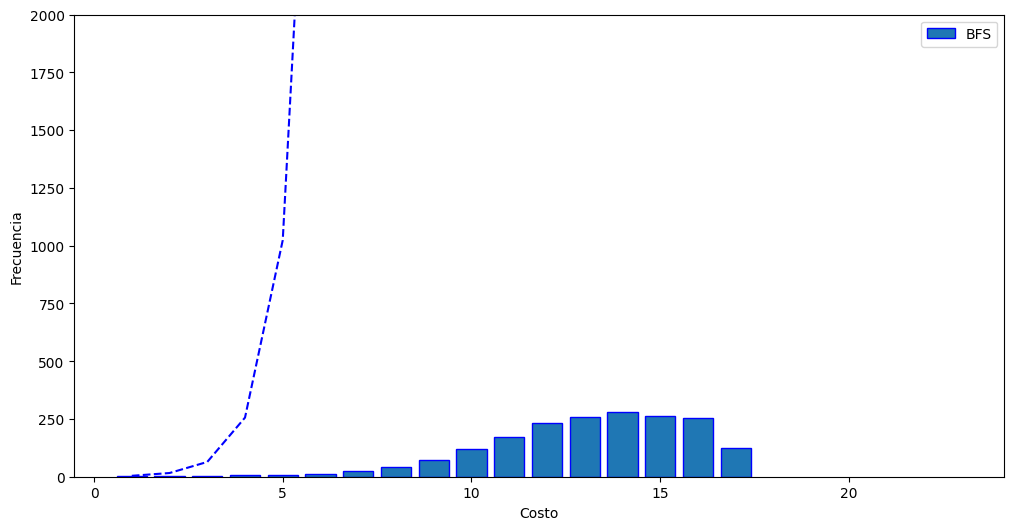

In [ ]:
#se repite lo mismo comparando si se contaria los estados repetidos
longitudes_BFS = list(longitud_caminos_BFS.values())
frecuencias_BFS = Counter(longitudes_BFS)
longitudes_unicas_BFS = sorted(frecuencias_BFS.keys())

plt.figure(figsize=(12, 6))
frecuencias_values_BFS = [frecuencias_BFS[longitud] for longitud in longitudes_unicas_BFS]


plt.bar(longitudes_unicas_BFS, frecuencias_values_BFS, edgecolor='blue', label='BFS')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.legend()
#plt.xlim(0,23)
#plt.ylim(0,200)

#se grafica los estados posibles si se cuenta los estados repetidos
secuencia = []
valor = 4
for _ in range(23):
  secuencia.append(valor)
  valor *= 4

x = list(range(1, 23 + 1))
plt.plot(x, secuencia, linestyle='--', color='b')
plt.ylim(0,2000)
plt.show()

# **DFS**

In [ ]:
inicio = time.time()
#el codigo es similar, se cambia la forma de almacenar y explorar los estados
from collections import deque
mapa_simbolo_DFS=mapa_simbolo.copy()

movimientos= [0, 1, 2, 3]

pila= deque([(mapa_simbolo_DFS, [])])
visited = set()
visited.add(tuple(map(tuple, mapa_simbolo_DFS)))
indices_ganador = set(encontrar_indices(mapa_original, 'M'))
contador_estados_expandidos=0

while pila:
    mapa_actual, path = pila.pop()

    contador_estados_expandidos= contador_estados_expandidos + 1

    for i in range(4):
        mapa_nuevo = mover_metodos(mapa_actual,movimientos[i])

        state = tuple(map(tuple, mapa_nuevo))
        d=movimientos[i]
        if state not in visited:
            visited.add(state)
            pila.append((mapa_nuevo, path + [d]))

        indices_nuevo = set(encontrar_indices(mapa_nuevo, 'X'))

        if indices_nuevo==indices_ganador:
         path=path + [d]
         break
    if indices_nuevo==indices_ganador:
      print("Solución encontrada")
      break

else:
    print("No se encontró solución")

final = time.time()
tiempo = final- inicio

print(f"Tiempo de ejecución: {tiempo} segundos")

Solución encontrada
Tiempo de ejecución: 1.5833852291107178 segundos


In [ ]:
print(path)
print(len(path))

[3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 2, 2, 2, 0, 3, 3, 2, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 2, 3, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 3, 0, 3, 0, 3, 3, 1, 1, 3, 1, 2, 2, 3, 3, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 3, 1, 3, 0, 3, 0, 2, 3, 3, 3, 3, 1, 1, 2, 2, 2, 2, 2, 0, 0, 3, 0, 2, 3, 3, 3, 3, 3, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 3, 3, 3]
131


Solución encontrada


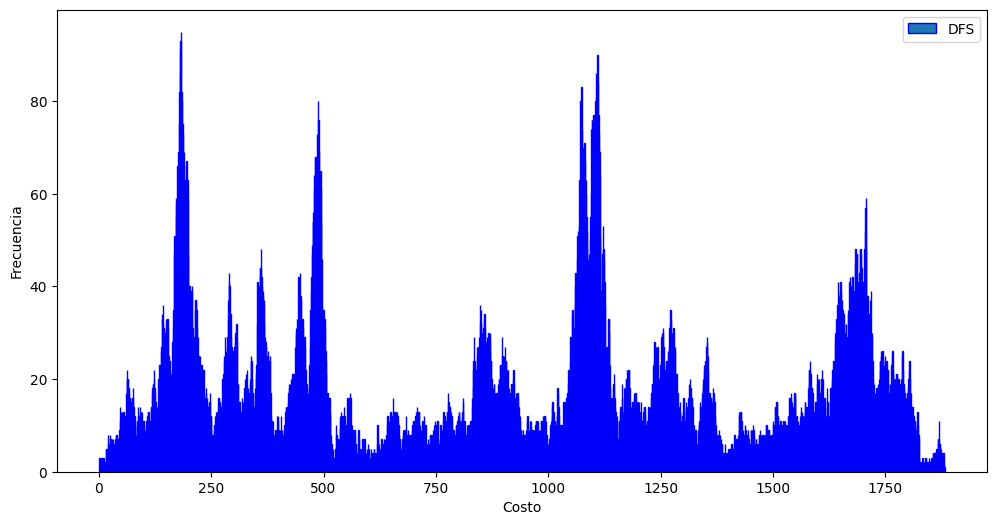

In [ ]:
#se repite el codigo para graficar el histograma
mapa_simbolo_DFS = mapa_simbolo.copy()

movimientos = [0, 1, 2, 3]
pila = deque([(mapa_simbolo_BFS, [])])
visited = set()
visited.add(tuple(map(tuple, mapa_simbolo_DFS)))
indices_ganador = set(encontrar_indices(mapa_original, 'M'))
longitud_caminos_DFS = {}
contador_estados_expandidos = 0
while queue:
    mapa_actual, path = pila.pop()
    contador_estados_expandidos= contador_estados_expandidos + 1
    for i in range(4):
        mapa_nuevo = mover_metodos(mapa_actual, movimientos[i])
        state = tuple(map(tuple, mapa_nuevo))
        d = movimientos[i]
        if state not in visited:
            visited.add(state)
            pila.append((mapa_nuevo, path + [d]))
            longitud_caminos_DFS[state] = len(path) + 1
        indices_nuevo = set(encontrar_indices(mapa_nuevo, 'X'))
        if indices_nuevo == indices_ganador:
            path = path + [d]
            break
    if indices_nuevo==indices_ganador:
      print("Solución encontrada")
      break


else:
    print("No se encontró solución")

longitudes_DFS = list(longitud_caminos_DFS.values())
frecuencias_DFS = Counter(longitudes_DFS)
longitudes_unicas_DFS = sorted(frecuencias_DFS.keys())

plt.figure(figsize=(12, 6))
frecuencias_values_DFS = [frecuencias_DFS[longitud] for longitud in longitudes_unicas_DFS]

plt.bar(longitudes_unicas_DFS, frecuencias_values_DFS, edgecolor='black', label='DFS')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.legend()
#plt.xlim(0,23)
#plt.ylim(0,200)
plt.show()

In [ ]:
print(path)

[3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 0, 0, 3, 3, 1, 2, 3, 0, 3, 3, 3, 3, 1, 1, 2, 2, 1, 2, 3, 3, 3, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 1, 1, 2, 2, 1, 2, 2, 3, 3, 3, 3, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 3, 0, 3, 3, 0, 0, 2, 2, 2, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 3, 3, 3, 0, 3, 3, 1, 3, 3, 1, 1, 2, 3, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 3, 0, 3, 3, 0, 3, 3, 1, 3, 3, 0, 2, 3, 1, 1, 2, 2, 1, 3, 3, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 3, 0, 3, 3, 0, 3, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 0, 0, 2, 0, 3, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 3, 0, 2, 3, 3, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 2, 3, 1, 1, 2, 2, 1, 1, 3, 3, 1, 1, 2, 2, 2, 2, 0, 3, 3, 2, 2, 2, 2, 2, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 1, 1, 2, 1, 1, 3, 1, 2, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 2, 3, 3, 1, 1, 2, 2, 1, 1, 3, 3, 1, 1, 2, 2, 3, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 3, 

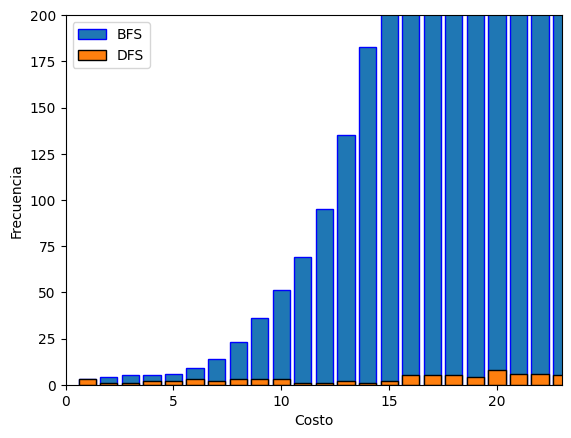

In [ ]:
#se compara ambos metodos
plt.bar(longitudes_unicas_BFS, frecuencias_values_BFS, edgecolor='blue', label='BFS')
plt.bar(longitudes_unicas_DFS, frecuencias_values_DFS, edgecolor='black', label='DFS')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.legend()
plt.xlim(0,23)
plt.ylim(0,200)
plt.show()

# **Se define las funciones y heuristicas para Greedy y A**

In [17]:
from itertools import permutations

#por algun motivo la condcion ganadora antes definida no funciona en el codigo, se define una forma nueva para cumplir eso
def encontrar_indices(matriz, elemento):
    indices = []
    for i, fila in enumerate(matriz):
        for j, valor in enumerate(fila):
            if valor == elemento:
                indices.append((i, j))
    return indices

# por comodidad, se crea sub funciones
def distancia_manhattan(p1, p2):
  x1, y1 =p1
  x2, y2 =p2

  return abs(x1-x2) + abs(y1-y2)

def heuristica_DM_CM_1_caja(mapa):
  A=[(i, j) for i, row in enumerate(mapa) for j, val in enumerate(row) if val == caja]
  B=[(i, j) for i, row in enumerate(mapa_original) for j, val in enumerate(row) if val == marca]

  A0=A[0]
  B0=B[0]
  distancia = distancia_manhattan(A0,B0)
  return distancia

def heuristica_DM_PC_1_caja(mapa):
  A=[(i, j) for i, row in enumerate(mapa) for j, val in enumerate(row) if val == personaje]
  B=[(i, j) for i, row in enumerate(mapa) for j, val in enumerate(row) if val == caja]

  A0=A[0]
  B0=B[0]
  distancia = distancia_manhattan(A0,B0)-1
  return distancia

#se hace print para corroborar
print(heuristica_DM_PC_1_caja(mapa_simbolo))

def heuristica_DM_total_1_caja(mapa):
  distancia1=heuristica_DM_CM_1_caja(mapa)
  distancia2=heuristica_DM_PC_1_caja(mapa)
  distancia=distancia1+distancia2

  return distancia

#se hace print para corroborar
print(heuristica_DM_total_1_caja(mapa_simbolo))

#------------------------------------------------------------------------------------------

def distancia_manhattan_p0(p1, p2):
  x1, y1 =p1
  x2, y2 =p2

  return abs(x1-x2) ,abs(y1-y2)


def heuristica_d0(mapa):
  distancia1=heuristica_DM_CM_1_caja(mapa)
  #-------------------------------------------------------------------------------------------
  A=[(i, j) for i, row in enumerate(mapa) for j, val in enumerate(row) if val == personaje]
  B=[(i, j) for i, row in enumerate(mapa) for j, val in enumerate(row) if val == caja]

  A0=A[0]
  B0=B[0]
  distx,disty = distancia_manhattan_p0(A0,B0)

  distancia2=distx+disty-1

  if distx==1 and disty==1:
    distancia2=0

  distancia=distancia1+distancia2

  return distancia

print(heuristica_d0(mapa_simbolo))


4
7
7


# **Greedy**

In [18]:
#se verifica el mapa actual
print(mapa_simbolo)

[['/' '/' '/' '/' '/' '/' '/' '/' '/' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' 'M' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' '/' '/' '/' '/' '/' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' 'X' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '/']
 ['/' ' ' ' ' ' ' ' ' ' ' ' ' 'P' ' ' '/']
 ['/' '/' '/' '/' '/' '/' '/' '/' '/' '/']]


Se necesita adaptar el codigo para que calcule la heuristica

In [19]:
import time
inicio = time.time()
#el codigo es similar, se cambia la forma de almacenar y explorar los estados, y el la lista se define la heuristica
import heapq
mapa_simbolo_greedy=mapa_simbolo.copy()

movimientos= [0, 1, 2, 3]
cola=[]
# se convierte el mapa antes de añadirlo
heapq.heappush(cola, (heuristica_DM_CM_1_caja(mapa_simbolo_greedy), tuple(map(tuple, mapa_simbolo_greedy)), []))


visited = set()
visited.add(tuple(map(tuple,mapa_simbolo_greedy)))
indices_ganador = set(encontrar_indices(mapa_original, 'M'))
contador_estados_expandidos=0

while cola:
    _, mapa_actual, path = heapq.heappop(cola)


    contador_estados_expandidos= contador_estados_expandidos + 1
    mapa_actual = np.array(mapa_actual)

    for i in range(4):
        mapa_nuevo = mover_metodos(mapa_actual,movimientos[i])
        state = tuple(map(tuple, mapa_nuevo))
        d=movimientos[i]
        if state not in visited:
            visited.add(state)

            h=heuristica_DM_CM_1_caja(mapa_nuevo)
            heapq.heappush(cola, (h, tuple(map(tuple, mapa_nuevo)), path + [d]))

        indices_nuevo = set(encontrar_indices(mapa_nuevo, 'X'))

        if indices_nuevo==indices_ganador:
         path=path + [d]
         break
    if indices_nuevo==indices_ganador:
      print("Solución encontrada")
      break
else:
    print("No se encontró solución")

final = time.time()
tiempo = final- inicio
print(f"Tiempo de ejecución: {tiempo} segundos")

Solución encontrada
Tiempo de ejecución: 0.603687047958374 segundos


In [20]:
print(path)
print(len(path))

[2, 2, 0, 0, 0, 3, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 3, 3, 3]
19


In [22]:
guardar_imagen(path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

greedy contando los duplicados(consume toda la memoria) al correr el proyecto se va a desconectar-cuidado

In [ ]:
import time
inicio = time.time()
#el codigo es similar se saca la parte en donde no se añade el estado si ya fue visitado
import heapq
mapa_simbolo_greedy=mapa_simbolo.copy()

movimientos= [0, 1, 2, 3]
cola=[]

heapq.heappush(cola, (heuristica_DM_CM_1_caja(mapa_simbolo_greedy), tuple(map(tuple, mapa_simbolo_greedy)), []))

visited = set()
visited.add(tuple(map(tuple,mapa_simbolo_greedy)))
indices_ganador = set(encontrar_indices(mapa_original, 'M'))
contador_estados_expandidos=0

while cola:
    _, mapa_actual, path = heapq.heappop(cola)


    contador_estados_expandidos= contador_estados_expandidos + 1
    mapa_actual = np.array(mapa_actual)

    for i in range(4):
        mapa_nuevo = mover_metodos(mapa_actual,movimientos[i])
        state = tuple(map(tuple, mapa_nuevo))
        d=movimientos[i]

        visited.add(state)
        h=heuristica_DM_CM_1_caja(mapa_nuevo)
        heapq.heappush(cola, (h, tuple(map(tuple, mapa_nuevo)), path + [d]))

        indices_nuevo = set(encontrar_indices(mapa_nuevo, 'X'))

        if indices_nuevo==indices_ganador:
         path=path + [d]
         break
    if indices_nuevo==indices_ganador:
      print("Solución encontrada")
      break
else:
    print("No se encontró solución")

final = time.time()
tiempo = final- inicio
print(f"Tiempo de ejecución: {tiempo} segundos")

Solución encontrada
Tiempo de ejecución: 0.6485605239868164 segundos


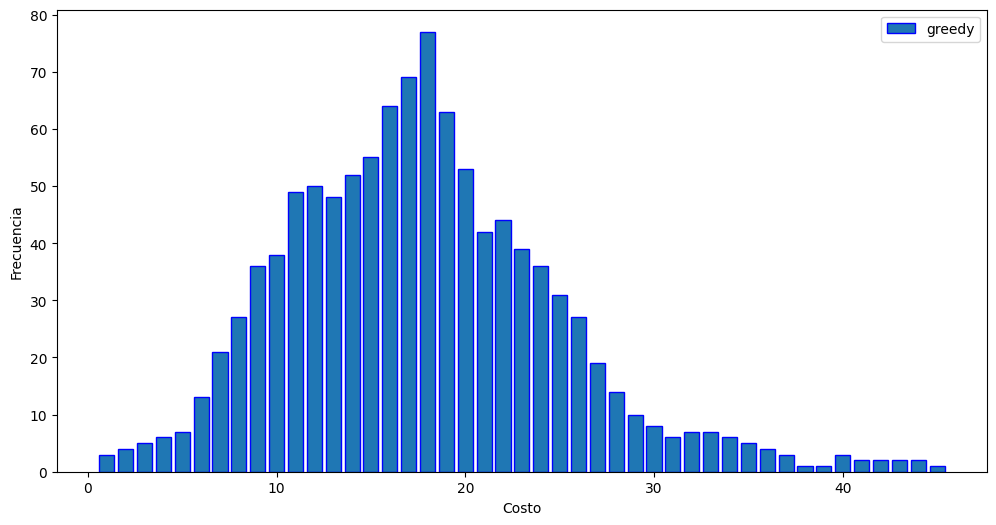

In [29]:
#se grafica los estados visitados heuristica 1
import time
inicio = time.time()
#el codigo es similar, se cambia la forma de almacenar y explorar los estados, y el la lista se define la heuristica
import heapq
mapa_simbolo_greedy=mapa_simbolo.copy()

movimientos= [0, 1, 2, 3]
cola=[]
# se convierte el mapa antes de añadirlo
heapq.heappush(cola, (heuristica_DM_CM_1_caja(mapa_simbolo_greedy), tuple(map(tuple, mapa_simbolo_greedy)), []))


visited = set()
visited.add(tuple(map(tuple,mapa_simbolo_greedy)))
indices_ganador = set(encontrar_indices(mapa_original, 'M'))
contador_estados_expandidos=0
longuitud_caminos_greedy = {}

while cola:
    _, mapa_actual, path = heapq.heappop(cola)


    contador_estados_expandidos= contador_estados_expandidos + 1
    mapa_actual = np.array(mapa_actual)

    for i in range(4):
        mapa_nuevo = mover_metodos(mapa_actual,movimientos[i])
        state = tuple(map(tuple, mapa_nuevo))
        d=movimientos[i]
        if state not in visited:
            visited.add(state)

            h=heuristica_DM_CM_1_caja(mapa_nuevo)
            heapq.heappush(cola, (h, tuple(map(tuple, mapa_nuevo)), path + [d]))
            longuitud_caminos_greedy[state] = len(path) + 1  # Guardar la longitud del camino

        indices_nuevo = set(encontrar_indices(mapa_nuevo, 'X'))

        if indices_nuevo==indices_ganador:
         path=path + [d]
         break
    if indices_nuevo==indices_ganador:
      print("Solución encontrada")
      break
else:
    print("No se encontró solución")

final = time.time()
tiempo = final- inicio
print(f"Tiempo de ejecución: {tiempo} segundos")



longitudes_greedy = list(longuitud_caminos_greedy.values())
frecuencias_greedy = Counter(longitudes_greedy)
longitudes_unicas_greedy = sorted(frecuencias_greedy.keys())


frecuencias_values_greedy = [frecuencias_greedy[longitud] for longitud in longitudes_unicas_greedy]

plt.figure(figsize=(12, 6))
plt.bar(longitudes_unicas_greedy, frecuencias_values_greedy, edgecolor='blue', label='greedy')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.legend()
#plt.xlim(0,23)
#plt.ylim(0,200)
plt.show()

In [28]:
#se grafica los estados visitados heuristica 2
import time
inicio = time.time()
#el codigo es similar, se cambia la forma de almacenar y explorar los estados, y el la lista se define la heuristica
import heapq
mapa_simbolo_greedy=mapa_simbolo.copy()

movimientos= [0, 1, 2, 3]
cola=[]
# se convierte el mapa antes de añadirlo
heapq.heappush(cola, (heuristica_DM_PC_1_caja(mapa_simbolo_greedy), tuple(map(tuple, mapa_simbolo_greedy)), []))


visited = set()
visited.add(tuple(map(tuple,mapa_simbolo_greedy)))
indices_ganador = set(encontrar_indices(mapa_original, 'M'))
contador_estados_expandidos=0
longuitud_caminos_greedy = {}

while cola:
    _, mapa_actual, path = heapq.heappop(cola)


    contador_estados_expandidos= contador_estados_expandidos + 1
    mapa_actual = np.array(mapa_actual)

    for i in range(4):
        mapa_nuevo = mover_metodos(mapa_actual,movimientos[i])
        state = tuple(map(tuple, mapa_nuevo))
        d=movimientos[i]
        if state not in visited:
            visited.add(state)

            h=heuristica_DM_PC_1_caja(mapa_nuevo)
            heapq.heappush(cola, (h, tuple(map(tuple, mapa_nuevo)), path + [d]))
            longuitud_caminos_greedy[state] = len(path) + 1  # Guardar la longitud del camino

        indices_nuevo = set(encontrar_indices(mapa_nuevo, 'X'))

        if indices_nuevo==indices_ganador:
         path=path + [d]
         break
    if indices_nuevo==indices_ganador:
      print("Solución encontrada")
      break
else:
    print("No se encontró solución")

final = time.time()
tiempo = final- inicio
print(f"Tiempo de ejecución: {tiempo} segundos")



longitudes_greedy2 = list(longuitud_caminos_greedy.values())
frecuencias_greedy2 = Counter(longitudes_greedy2)
longitudes_unicas_greedy2 = sorted(frecuencias_greedy2.keys())


frecuencias_values_greedy2 = [frecuencias_greedy2[longitud] for longitud in longitudes_unicas_greedy2]

Solución encontrada
Tiempo de ejecución: 0.45607662200927734 segundos


In [24]:
print(path)
print(len(path))

[2, 2, 0, 0, 3, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 3, 3, 3]
19


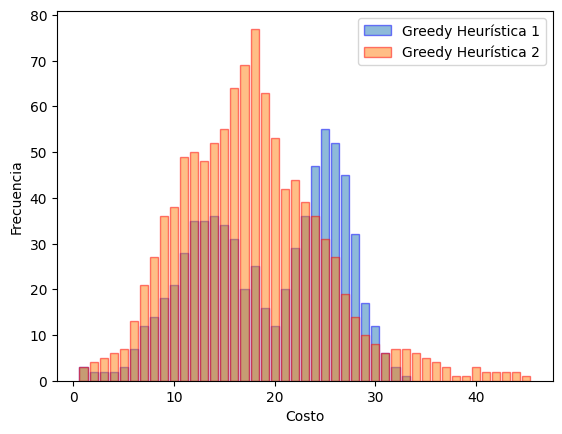

In [25]:
plt.bar(longitudes_unicas_greedy2, frecuencias_values_greedy2, edgecolor='blue',alpha=0.5, label='Greedy Heurística 1')
plt.bar(longitudes_unicas_greedy, frecuencias_values_greedy, edgecolor='red',alpha=0.5, label='Greedy Heurística 2')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.legend()
#plt.xlim(0,23)
#plt.ylim(0,200)
plt.show()

In [26]:
#se grafica los estados visitados heuristica 3
import time
inicio = time.time()
#el codigo es similar, se cambia la forma de almacenar y explorar los estados, y el la lista se define la heuristica
import heapq
mapa_simbolo_greedy=mapa_simbolo.copy()

movimientos= [0, 1, 2, 3]
cola=[]
# se convierte el mapa antes de añadirlo
heapq.heappush(cola, (heuristica_DM_total_1_caja(mapa_simbolo_greedy), tuple(map(tuple, mapa_simbolo_greedy)), []))


visited = set()
visited.add(tuple(map(tuple,mapa_simbolo_greedy)))
indices_ganador = set(encontrar_indices(mapa_original, 'M'))
contador_estados_expandidos=0
longuitud_caminos_greedy = {}

while cola:
    _, mapa_actual, path = heapq.heappop(cola)


    contador_estados_expandidos= contador_estados_expandidos + 1
    mapa_actual = np.array(mapa_actual)

    for i in range(4):
        mapa_nuevo = mover_metodos(mapa_actual,movimientos[i])
        state = tuple(map(tuple, mapa_nuevo))
        d=movimientos[i]
        if state not in visited:
            visited.add(state)

            h=heuristica_DM_total_1_caja(mapa_nuevo)
            heapq.heappush(cola, (h, tuple(map(tuple, mapa_nuevo)), path + [d]))
            longuitud_caminos_greedy[state] = len(path) + 1  # Guardar la longitud del camino

        indices_nuevo = set(encontrar_indices(mapa_nuevo, 'X'))

        if indices_nuevo==indices_ganador:
         path=path + [d]
         break
    if indices_nuevo==indices_ganador:
      print("Solución encontrada")
      break
else:
    print("No se encontró solución")

final = time.time()
tiempo = final- inicio
print(f"Tiempo de ejecución: {tiempo} segundos")



longitudes_greedy3 = list(longuitud_caminos_greedy.values())
frecuencias_greedy3 = Counter(longitudes_greedy3)
longitudes_unicas_greedy3 = sorted(frecuencias_greedy3.keys())


frecuencias_values_greedy3 = [frecuencias_greedy3[longitud] for longitud in longitudes_unicas_greedy3]

Solución encontrada
Tiempo de ejecución: 0.43190860748291016 segundos


In [27]:
print(path)
print(len(path))

[2, 2, 0, 0, 0, 3, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 3, 3, 3]
19


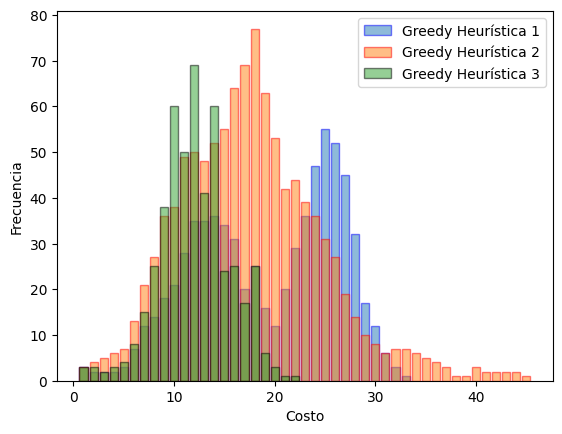

In [30]:
plt.bar(longitudes_unicas_greedy2, frecuencias_values_greedy2, edgecolor='blue',alpha=0.5, label='Greedy Heurística 1')
plt.bar(longitudes_unicas_greedy, frecuencias_values_greedy, edgecolor='red',alpha=0.5, label='Greedy Heurística 2')
plt.bar(longitudes_unicas_greedy3, frecuencias_values_greedy3, edgecolor='black',alpha=0.5, label='Greedy Heurística 3')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.legend()
#plt.xlim(0,23)
#plt.ylim(0,200)
plt.show()

# **A***

In [ ]:
import time
import heapq

inicio = time.time()
#el codigo es similar, se añade el costo en la lista
mapa_simbolo_A=mapa_simbolo.copy()
movimientos= [0, 1, 2, 3]
cola=[]
# se convierte el mapa antes de añadirlo
heapq.heappush(cola, (0+ heuristica_DM_CM_1_caja(mapa_simbolo_A),0, tuple(map(tuple, mapa_simbolo_A)), []))


visited = set()
visited.add(tuple(map(tuple,mapa_simbolo_A)))
indices_ganador = set(encontrar_indices(mapa_original, 'M'))
contador_estados_expandidos=0


while cola:
    _,costo, mapa_actual, path = heapq.heappop(cola)


    contador_estados_expandidos= contador_estados_expandidos + 1
    mapa_actual = np.array(mapa_actual)

    for i in range(4):
        mapa_nuevo = mover_metodos(mapa_actual,movimientos[i])
        state = tuple(map(tuple, mapa_nuevo))
        d=movimientos[i]
        #se calcula el costo acomulado
        nuevo_costo = costo + 1


        if state not in visited:
            visited.add(state)

            h=heuristica_DM_CM_1_caja(mapa_nuevo)
            f=nuevo_costo + h
            heapq.heappush(cola, (f,nuevo_costo, tuple(map(tuple, mapa_nuevo)), path + [d]))
        indices_nuevo = set(encontrar_indices(mapa_nuevo, 'X'))

        if indices_nuevo==indices_ganador:
         path=path + [d]
         break
    if indices_nuevo==indices_ganador:
      print("Solución encontrada")
      break
else:
    print("No se encontró solución")


final = time.time()
tiempo = final- inicio
print(f"Tiempo de ejecución: {tiempo} segundos")

Solución encontrada
Tiempo de ejecución: 2.020772933959961 segundos


In [ ]:
print(path)
print(len(path))



[2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 3, 3, 3]
25


Solución encontrada
Tiempo de ejecución: 2.0361459255218506 segundos


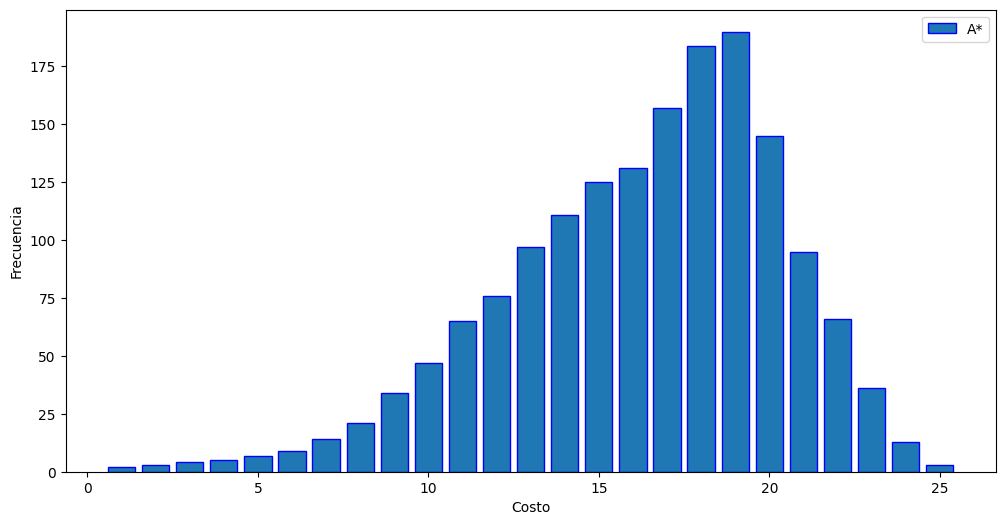

In [ ]:
#se repite el codigo para graficar el histograma

from collections import deque, defaultdict, Counter
import time
import heapq

inicio = time.time()
mapa_simbolo_A=mapa_simbolo.copy()
movimientos= [0, 1, 2, 3]
cola=[]
heapq.heappush(cola, (0+ heuristica_DM_CM_1_caja(mapa_simbolo_A),0, tuple(map(tuple, mapa_simbolo_A)), []))


visited1 = set()
expandido1=set()
visited1.add(tuple(map(tuple,mapa_simbolo_A)))
indices_ganador = set(encontrar_indices(mapa_original, 'M'))
contador_estados_expandidos=0
longuitud_caminos_A = {}

while cola:
    _,costo, mapa_actual, path = heapq.heappop(cola)

    contador_estados_expandidos= contador_estados_expandidos + 1
    mapa_actual = np.array(mapa_actual)

    expandido1.add(tuple(map(tuple, mapa_actual)))
    for i in range(4):
        mapa_nuevo = mover_metodos(mapa_actual,movimientos[i])
        state = tuple(map(tuple, mapa_nuevo))
        d=movimientos[i]
        #se calcula el costo acomulado
        nuevo_costo = costo + 1


        if state not in visited1:
            visited1.add(state)

            h=heuristica_DM_CM_1_caja(mapa_nuevo)
            f=nuevo_costo + h
            heapq.heappush(cola, (f,nuevo_costo, tuple(map(tuple, mapa_nuevo)), path + [d]))
            longuitud_caminos_A[state] = len(path) + 1  # Guardar la longitud del camino

        indices_nuevo = set(encontrar_indices(mapa_nuevo, 'X'))

        if indices_nuevo==indices_ganador:
         path=path + [d]
         break
    if indices_nuevo==indices_ganador:
      print("Solución encontrada")
      break
else:
    print("No se encontró solución")


final = time.time()
tiempo = final- inicio
print(f"Tiempo de ejecución: {tiempo} segundos")

longitudes_A = list(longuitud_caminos_A.values())
frecuencias_A = Counter(longitudes_A)
longitudes_unicas_A = sorted(frecuencias_A.keys())

plt.figure(figsize=(12, 6))
frecuencias_values_A = [frecuencias_A[longitud] for longitud in longitudes_unicas_A]


plt.bar(longitudes_unicas_A, frecuencias_values_A, edgecolor='blue', label='A*')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.legend()
#plt.xlim(0,23)
#plt.ylim(0,200)
plt.show()

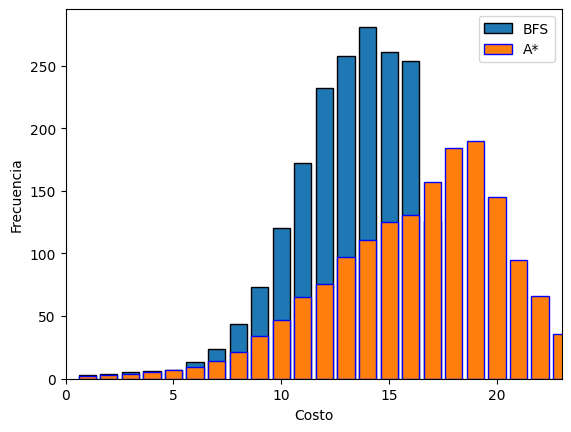

In [ ]:
#se comparan los histogramas
plt.bar(longitudes_unicas_BFS, frecuencias_values_BFS, edgecolor='black', label='BFS')
plt.bar(longitudes_unicas_A, frecuencias_values_A, edgecolor='blue', label='A*')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.legend()
plt.xlim(0,23)
#plt.ylim(0,200)
plt.show()

# **Se implementa A con otra heurística **

Solución encontrada
Tiempo de ejecución: 3.2645111083984375 segundos


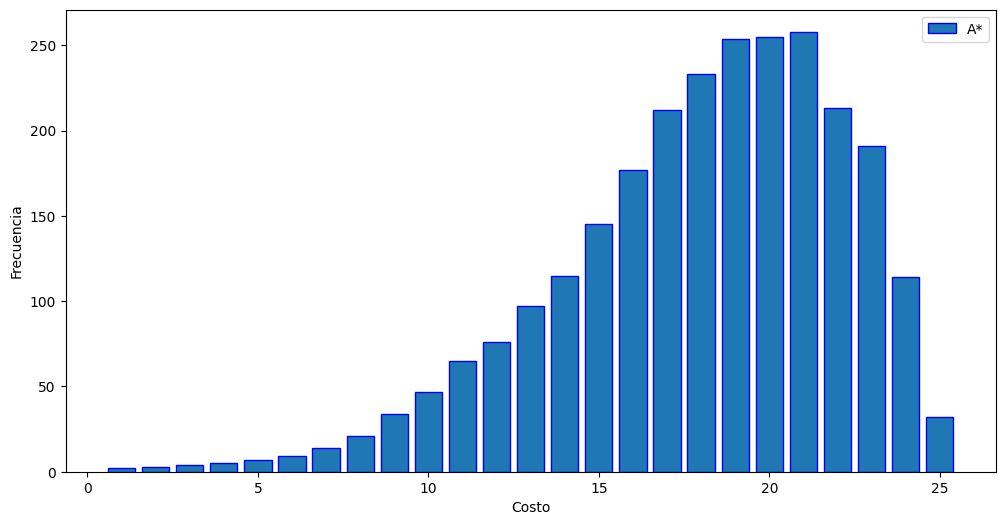

In [ ]:
from collections import deque, defaultdict, Counter
import time
import heapq

inicio = time.time()
mapa_simbolo_A=mapa_simbolo.copy()
movimientos= [0, 1, 2, 3]
cola=[]
heapq.heappush(cola, (0+ heuristica_DM_PC_1_caja(mapa_simbolo_A),0, tuple(map(tuple, mapa_simbolo_A)), []))

visited2 = set()
expandido2=set()
visited2.add(tuple(map(tuple,mapa_simbolo_A)))
indices_ganador = set(encontrar_indices(mapa_original, 'M'))
contador_estados_expandidos=0
longuitud_caminos_A = {}

while cola:
    _,costo, mapa_actual, path = heapq.heappop(cola)


    contador_estados_expandidos= contador_estados_expandidos + 1
    mapa_actual = np.array(mapa_actual)
    expandido2.add(tuple(map(tuple, mapa_actual)))
    for i in range(4):
        mapa_nuevo = mover_metodos(mapa_actual,movimientos[i])
        state = tuple(map(tuple, mapa_nuevo))
        d=movimientos[i]
        nuevo_costo = costo + 1


        if state not in visited2:
            visited2.add(state)

            h=heuristica_DM_PC_1_caja(mapa_nuevo)
            f=nuevo_costo + h
            heapq.heappush(cola, (f,nuevo_costo, tuple(map(tuple, mapa_nuevo)), path + [d]))
            longuitud_caminos_A[state] = len(path) + 1
        indices_nuevo = set(encontrar_indices(mapa_nuevo, 'X'))

        if indices_nuevo==indices_ganador:
         path=path + [d]
         break
    if indices_nuevo==indices_ganador:
      print("Solución encontrada")
      break
else:
    print("No se encontró solución")

final = time.time()
tiempo = final- inicio
print(f"Tiempo de ejecución: {tiempo} segundos")

longitudes_A2 = list(longuitud_caminos_A.values())
frecuencias_A2= Counter(longitudes_A2)
longitudes_unicas_A2 = sorted(frecuencias_A2.keys())

plt.figure(figsize=(12, 6))
frecuencias_values_A2 = [frecuencias_A2[longitud] for longitud in longitudes_unicas_A2]


plt.bar(longitudes_unicas_A2, frecuencias_values_A2, edgecolor='blue', label='A*')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.legend()
#plt.xlim(0,23)
#plt.ylim(0,200)
plt.show()

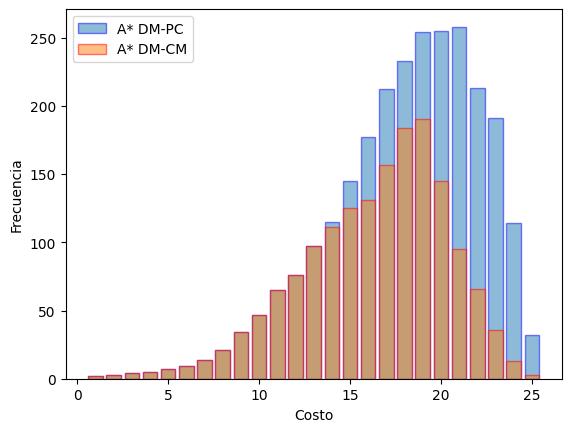

In [ ]:
plt.bar(longitudes_unicas_A2, frecuencias_values_A2, edgecolor='blue',alpha=0.5, label='A* DM-PC')
plt.bar(longitudes_unicas_A, frecuencias_values_A, edgecolor='red',alpha=0.5, label='A* DM-CM')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.legend()
#plt.xlim(0,23)
#plt.ylim(0,200)
plt.show()

In [ ]:
interseccion = expandido1 & expandido2
# Número de elementos en común
numero_en_comun = len(interseccion)
print(numero_en_comun)

1147


# **Se implementa otra la heuristica de la suma de las dos distancias**

Solución encontrada
Tiempo de ejecución: 1.9212515354156494 segundos


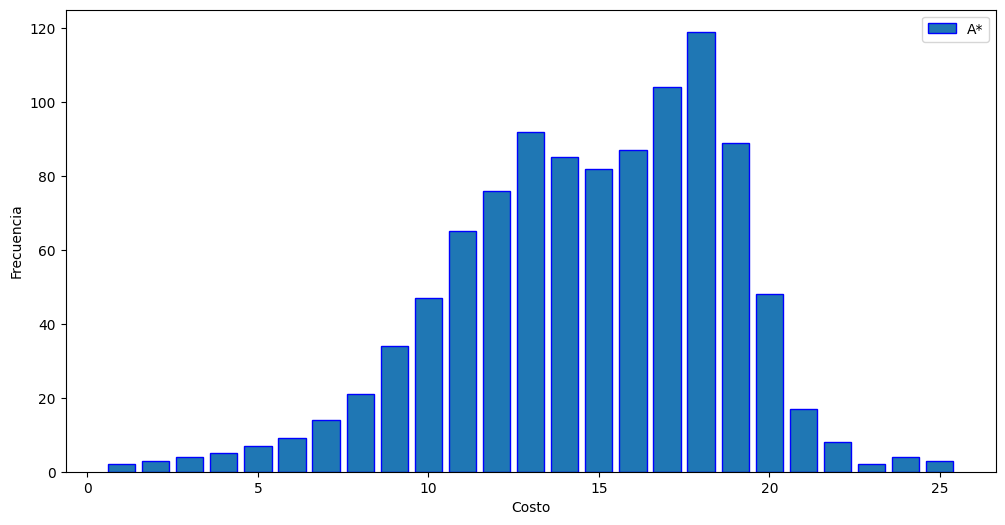

In [ ]:
from collections import deque, defaultdict, Counter
import time
import heapq

inicio = time.time()
mapa_simbolo_A=mapa_simbolo.copy()
movimientos= [0, 1, 2, 3]
cola=[]
heapq.heappush(cola, (0+ heuristica_DM_total_1_caja(mapa_simbolo_A),0, tuple(map(tuple, mapa_simbolo_A)), []))

visited3 = set()
expandido3=set()
visited3.add(tuple(map(tuple,mapa_simbolo_A)))
indices_ganador = set(encontrar_indices(mapa_original, 'M'))
contador_estados_expandidos=0
longuitud_caminos_A = {}

while cola:
    _,costo, mapa_actual, path = heapq.heappop(cola)


    contador_estados_expandidos= contador_estados_expandidos + 1
    mapa_actual = np.array(mapa_actual)
    expandido3.add(tuple(map(tuple, mapa_actual)))
    for i in range(4):
        mapa_nuevo = mover_metodos(mapa_actual,movimientos[i])
        state = tuple(map(tuple, mapa_nuevo))
        d=movimientos[i]
        nuevo_costo = costo + 1


        if state not in visited3:
            visited3.add(state)

            h=heuristica_DM_total_1_caja(mapa_nuevo)
            f=nuevo_costo + h
            heapq.heappush(cola, (f,nuevo_costo, tuple(map(tuple, mapa_nuevo)), path + [d]))
            longuitud_caminos_A[state] = len(path) + 1

        indices_nuevo = set(encontrar_indices(mapa_nuevo, 'X'))

        if indices_nuevo==indices_ganador:
         path=path + [d]
         break
    if indices_nuevo==indices_ganador:
      print("Solución encontrada")
      break
else:
    print("No se encontró solución")


final = time.time()
tiempo = final- inicio
print(f"Tiempo de ejecución: {tiempo} segundos")

longitudes_A3 = list(longuitud_caminos_A.values())
frecuencias_A3= Counter(longitudes_A3)
longitudes_unicas_A3 = sorted(frecuencias_A3.keys())

plt.figure(figsize=(12, 6))
frecuencias_values_A3 = [frecuencias_A3[longitud] for longitud in longitudes_unicas_A3]


plt.bar(longitudes_unicas_A3, frecuencias_values_A3, edgecolor='blue', label='A*')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.legend()
#plt.xlim(0,23)
#plt.ylim(0,200)
plt.show()

In [ ]:
print(path)
print(len(path))

[2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 3, 3, 3]
25


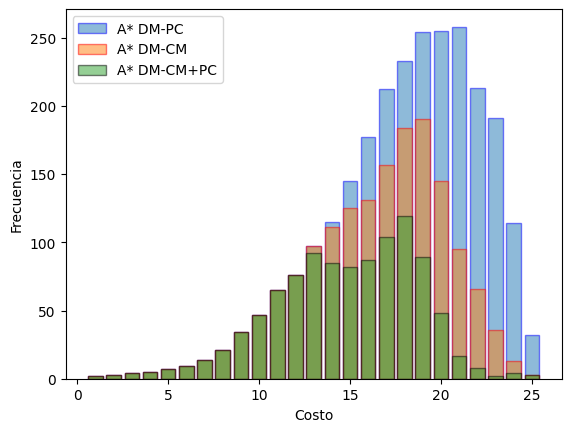

In [ ]:
plt.bar(longitudes_unicas_A2, frecuencias_values_A2, edgecolor='blue',alpha=0.5, label='A* DM-PC')
plt.bar(longitudes_unicas_A, frecuencias_values_A, edgecolor='red',alpha=0.5, label='A* DM-CM')
plt.bar(longitudes_unicas_A3, frecuencias_values_A3, edgecolor='black',alpha=0.5, label='A* DM-CM+PC')

plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.legend()
#plt.xlim(0,23)
#plt.ylim(0,200)
plt.show()

In [ ]:
interseccion = expandido3 & expandido2
# Número de elementos en común
numero_en_comun = len(interseccion)
print(numero_en_comun)

741


# **Se implementa la heuristica con diagonal cero**

Solución encontrada
Tiempo de ejecución: 1.5680434703826904 segundos


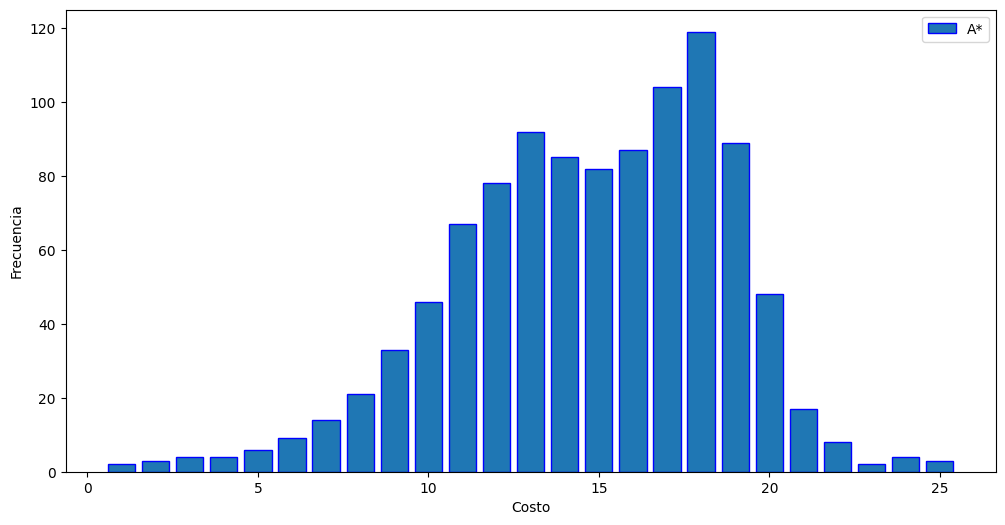

In [ ]:
from collections import deque, defaultdict, Counter
import time
import heapq

inicio = time.time()
mapa_simbolo_A=mapa_simbolo.copy()
movimientos= [0, 1, 2, 3]
cola=[]
heapq.heappush(cola, (0+ heuristica_d0(mapa_simbolo_A),0, tuple(map(tuple, mapa_simbolo_A)), []))


visited4 = set()
expandido4=set()
visited4.add(tuple(map(tuple,mapa_simbolo_A)))
indices_ganador = set(encontrar_indices(mapa_original, 'M'))
contador_estados_expandidos=0
longuitud_caminos_A = {}

while cola:
    _,costo, mapa_actual, path = heapq.heappop(cola)


    contador_estados_expandidos= contador_estados_expandidos + 1
    mapa_actual = np.array(mapa_actual)
    expandido4.add(tuple(map(tuple, mapa_actual)))
    for i in range(4):
        mapa_nuevo = mover_metodos(mapa_actual,movimientos[i])
        state = tuple(map(tuple, mapa_nuevo))
        d=movimientos[i]
        nuevo_costo = costo + 1


        if state not in visited4:
            visited4.add(state)

            h=heuristica_d0(mapa_nuevo)
            f=nuevo_costo + h
            heapq.heappush(cola, (f,nuevo_costo, tuple(map(tuple, mapa_nuevo)), path + [d]))
            longuitud_caminos_A[state] = len(path) + 1

        indices_nuevo = set(encontrar_indices(mapa_nuevo, 'X'))

        if indices_nuevo==indices_ganador:
         path=path + [d]
         break
    if indices_nuevo==indices_ganador:
      print("Solución encontrada")
      break
else:
    print("No se encontró solución")


final = time.time()
tiempo = final- inicio
print(f"Tiempo de ejecución: {tiempo} segundos")

longitudes_A4 = list(longuitud_caminos_A.values())
frecuencias_A4= Counter(longitudes_A4)
longitudes_unicas_A4 = sorted(frecuencias_A4.keys())

plt.figure(figsize=(12, 6))
frecuencias_values_A4 = [frecuencias_A4[longitud] for longitud in longitudes_unicas_A4]


plt.bar(longitudes_unicas_A4, frecuencias_values_A4, edgecolor='blue', label='A*')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.legend()
#plt.xlim(0,23)
#plt.ylim(0,200)
plt.show()

In [ ]:
interseccion = expandido4 & expandido3
# Número de elementos en común
numero_en_comun = len(interseccion)
print(numero_en_comun)

740


In [ ]:
#se compara las frecuencias para los diferentes costos
resultado = [a - b for a, b in zip(frecuencias_values_A4, frecuencias_values_A3)]
print(resultado)

[0, 0, 0, -1, -1, 0, 0, 0, -1, -1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
guardar_imagen(path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **se carga otro nivel, para evaluar ventaja entre la heuristica con diagonal cero y sin **

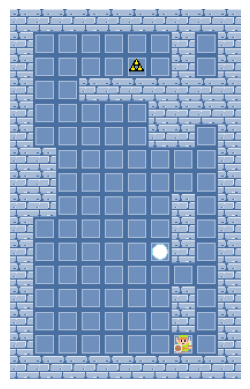

In [ ]:
mapa_original= [
    ['/', '/', '/', '/', '/', '/', '/', '/', '/', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', '/', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', 'M', ' ', '/', ' ', '/'],
    ['/', ' ', ' ', '/', '/', '/', '/', '/', '/', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', '/', '/', '/', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', '/', '/', ' ', '/'],
    ['/', '/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', '/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', '/', ' ', ' ', ' ', ' ', ' ', '/', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', '/', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', '/', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', '/', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', '/', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '/'],
    ['/', '/', '/', '/', '/', '/', '/', '/', '/', '/']
]

#se define la ubicación del personaje, en python el extremo superior izquierdo es el (0,0)
posicion_inicial_personaje_fila=14
posicion_inicial_personaje_columna=7
#se define la ubicación de las cajas
caja_1_p=(10,6)
#caja_2_p=(5,5)
#caja_1_y=5
#caja_2_x=2
#caja_2_y=7

#se pasa a un array
mapa_original=np.array(mapa_original)
mapa_simbolo= np.array(mapa_original)


#se añade el personaje
mapa_simbolo[posicion_inicial_personaje_fila,posicion_inicial_personaje_columna]='P'
#se añade las cajas
mapa_simbolo[caja_1_p[0],caja_1_p[1]]='X'
#mapa_simbolo[caja_2_p[0],caja_2_p[1]]='X'
#se obtiene las dimensiones del mapa
filas,columnas= np.shape(mapa_simbolo)

#Se crea la imagen del mapa en negro con los tres canales
#cada sprite es 20x20 pixeles, por eso se multiplica las filas y columnas por 20
imagen_mapa= np.zeros((filas*20,columnas*20, 3))
#se añade los sprites correspondientes a cada pixel
for i in range(filas):
  for j in range(columnas):
    if mapa_original[i][j] == '/':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_pared
    if mapa_original[i][j] == ' ':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_suelo
    if mapa_original[i][j] == 'M':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_marca
    if mapa_simbolo[i][j] == 'X':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_caja
    if mapa_simbolo[i][j] == 'P':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_personaje

plt.axis("off")
plt.imshow(imagen_mapa)
plt.show()

# **Se define el mapa para el análisis multi caja**

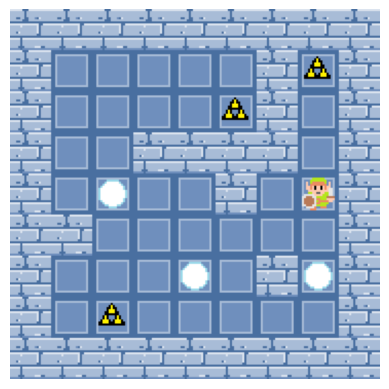

In [ ]:
mapa_original= [
    ['/', '/', '/', '/', '/', '/',  '/', '/', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ',  '/', 'M', '/'],
    ['/', ' ', ' ', ' ', ' ', 'M',  '/', ' ', '/'],
    ['/', ' ', ' ', '/', '/', '/',  '/', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ',  '/', ' ', ' ', '/'],
    ['/', '/', ' ', ' ', ' ', ' ',  ' ', ' ', '/'],
    ['/', ' ', ' ', ' ', ' ', ' ',  '/', ' ', '/'],
    ['/', ' ', 'M', ' ', ' ', ' ',  ' ', ' ', '/'],
    ['/', '/', '/', '/', '/', '/',  '/', '/', '/']
]

#se define la ubicación del personaje, en python el extremo superior izquierdo es el (0,0)
posicion_inicial_personaje_fila=4
posicion_inicial_personaje_columna=7
#se define la ubicación de las cajas
caja_1_p=(6,7)
caja_2_p=(4,2)
caja_3_p=(6,4)
#caja_1_y=5
#caja_2_x=2
#caja_2_y=7

#se pasa a un array
mapa_original=np.array(mapa_original)
mapa_simbolo= np.array(mapa_original)


#se añade el personaje
mapa_simbolo[posicion_inicial_personaje_fila,posicion_inicial_personaje_columna]='P'
#se añade las cajas
mapa_simbolo[caja_1_p[0],caja_1_p[1]]='X'
mapa_simbolo[caja_2_p[0],caja_2_p[1]]='X'
mapa_simbolo[caja_3_p[0],caja_3_p[1]]='X'
#se obtiene las dimensiones del mapa
filas,columnas= np.shape(mapa_simbolo)

#Se crea la imagen del mapa en negro con los tres canales
#cada sprite es 20x20 pixeles, por eso se multiplica las filas y columnas por 20
imagen_mapa= np.zeros((filas*20,columnas*20, 3))
#se añade los sprites correspondientes a cada pixel
for i in range(filas):
  for j in range(columnas):
    if mapa_original[i][j] == '/':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_pared
    if mapa_original[i][j] == ' ':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_suelo
    if mapa_original[i][j] == 'M':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_marca
    if mapa_simbolo[i][j] == 'X':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_caja
    if mapa_simbolo[i][j] == 'P':
      imagen_mapa[i*20:(i+1)*20, j*20:(j+1)*20] = sprite_personaje

plt.axis("off")
plt.imshow(imagen_mapa)
plt.show()

In [ ]:
#se define la heuristica
def heuristica_cajas_incorrectas(mapa):
  cajas_act=cantidad_cajas_activadas(mapa)
  cantidad_cajas=np.sum(mapa_simbolo == caja)
  cajas_incorrectas= cantidad_cajas-cajas_act

  return cajas_incorrectas

heuristica_cajas_incorrectas(mapa_simbolo)

3

Se implementa A con la heuristica de conteo de cajas en la posicion incorrecta

Solución encontrada
Tiempo de ejecución: 39.84318566322327 segundos


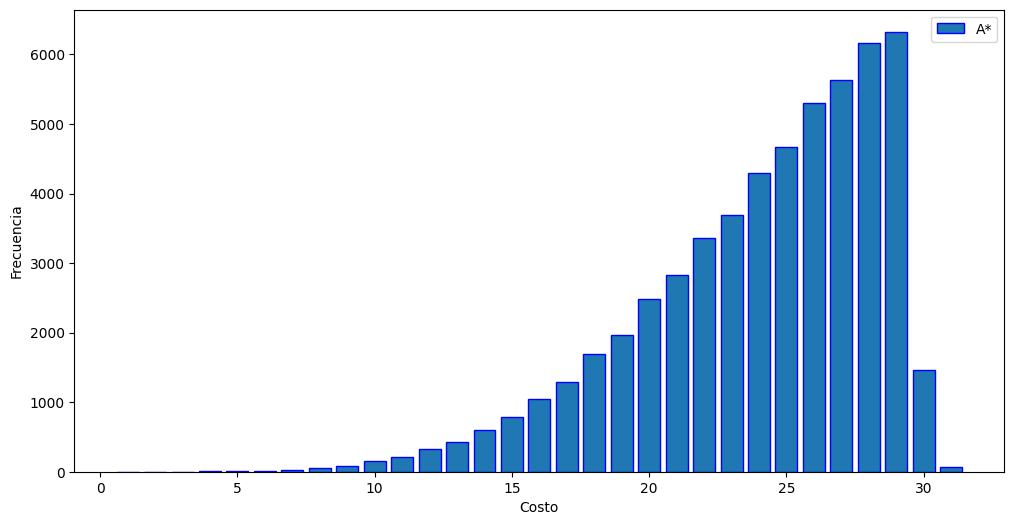

In [ ]:
from collections import deque, defaultdict, Counter
import time
import heapq

inicio = time.time()
mapa_simbolo_A=mapa_simbolo.copy()
movimientos= [0, 1, 2, 3]
cola=[]
heapq.heappush(cola, (0+ heuristica_cajas_incorrectas(mapa_simbolo_A),0, tuple(map(tuple, mapa_simbolo_A)), []))

visited4 = set()
expandido4=set()
visited4.add(tuple(map(tuple,mapa_simbolo_A)))
indices_ganador = set(encontrar_indices(mapa_original, 'M'))
contador_estados_expandidos=0
longuitud_caminos_A = {}

while cola:
    _,costo, mapa_actual, path = heapq.heappop(cola)


    contador_estados_expandidos= contador_estados_expandidos + 1
    mapa_actual = np.array(mapa_actual)
    expandido4.add(tuple(map(tuple, mapa_actual)))
    for i in range(4):
        mapa_nuevo = mover_metodos(mapa_actual,movimientos[i])
        state = tuple(map(tuple, mapa_nuevo))
        d=movimientos[i]
        nuevo_costo = costo + 1


        if state not in visited4:
            visited4.add(state)

            h=heuristica_cajas_incorrectas(mapa_nuevo)
            f=nuevo_costo + h
            heapq.heappush(cola, (f,nuevo_costo, tuple(map(tuple, mapa_nuevo)), path + [d]))
            longuitud_caminos_A[state] = len(path) + 1

        indices_nuevo = set(encontrar_indices(mapa_nuevo, 'X'))

        if indices_nuevo==indices_ganador:
         path=path + [d]
         break
    if indices_nuevo==indices_ganador:
      print("Solución encontrada")
      break
else:
    print("No se encontró solución")


final = time.time()
tiempo = final- inicio
print(f"Tiempo de ejecución: {tiempo} segundos")

longitudes_A4 = list(longuitud_caminos_A.values())
frecuencias_A4= Counter(longitudes_A4)
longitudes_unicas_A4 = sorted(frecuencias_A4.keys())

plt.figure(figsize=(12, 6))
frecuencias_values_A4 = [frecuencias_A4[longitud] for longitud in longitudes_unicas_A4]


plt.bar(longitudes_unicas_A4, frecuencias_values_A4, edgecolor='blue', label='A*')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.legend()
#plt.xlim(0,23)
#plt.ylim(0,200)
plt.show()

Solución encontrada
Tiempo de ejecución: 41.265382528305054 segundos


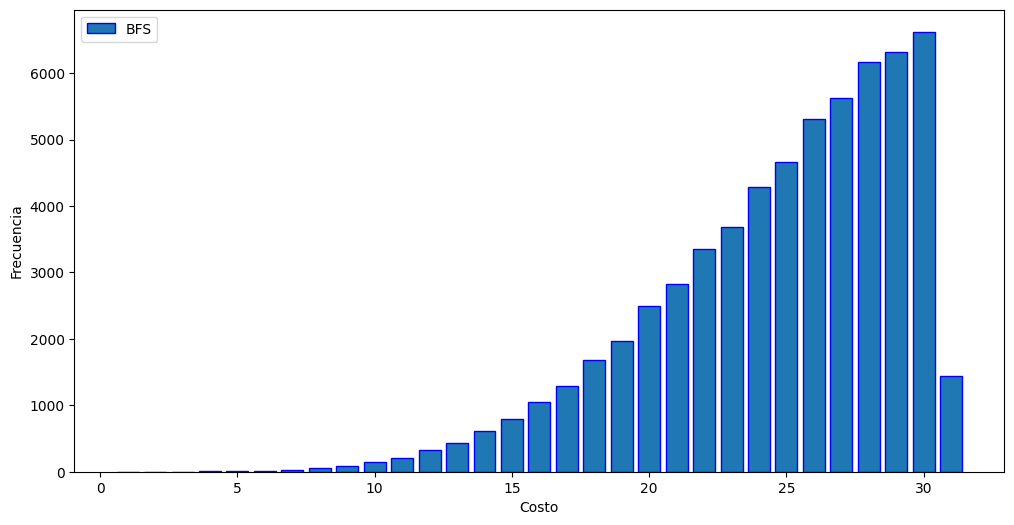

In [ ]:
inicio = time.time()
mapa_simbolo_BFS = mapa_simbolo.copy()

movimientos = [0, 1, 2, 3]
queue = deque([(mapa_simbolo_BFS, [])])
visited = set()
visited.add(tuple(map(tuple, mapa_simbolo_BFS)))
indices_ganador = set(encontrar_indices(mapa_original, 'M'))

longitud_caminos_BFS = {}
contador_estados_expandidos = 0
while queue:
    mapa_actual, path = queue.popleft()

    contador_estados_expandidos= contador_estados_expandidos + 1
    for i in range(4):
        mapa_nuevo = mover_metodos(mapa_actual, movimientos[i])
        state = tuple(map(tuple, mapa_nuevo))
        d = movimientos[i]

        if state not in visited:
            visited.add(state)
            queue.append((mapa_nuevo, path + [d]))
            longitud_caminos_BFS[state] = len(path) + 1

        indices_nuevo = set(encontrar_indices(mapa_nuevo, 'X'))

        if indices_nuevo == indices_ganador:
            path = path + [d]
            break
    if indices_nuevo==indices_ganador:
      print("Solución encontrada")
      break
else:
    print("No se encontró solución")

final = time.time()
tiempo = final- inicio
print(f"Tiempo de ejecución: {tiempo} segundos")
longitudes_BFS = list(longitud_caminos_BFS.values())
frecuencias_BFS = Counter(longitudes_BFS)
longitudes_unicas_BFS = sorted(frecuencias_BFS.keys())

plt.figure(figsize=(12, 6))
frecuencias_values_BFS = [frecuencias_BFS[longitud] for longitud in longitudes_unicas_BFS]


plt.bar(longitudes_unicas_BFS, frecuencias_values_BFS, edgecolor='blue', label='BFS')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.legend()
#plt.xlim(0,23)
#plt.ylim(0,200)
plt.show()

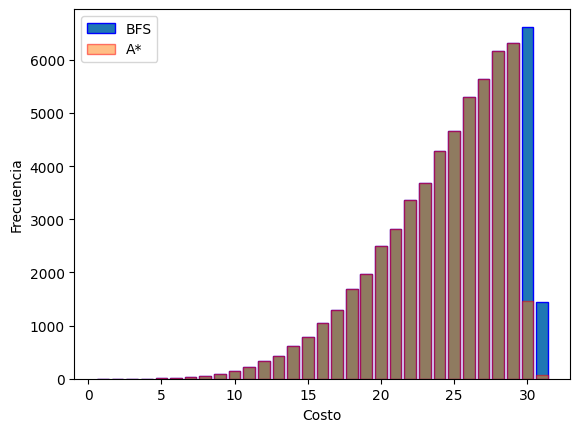

In [ ]:
plt.bar(longitudes_unicas_BFS, frecuencias_values_BFS, edgecolor='blue', label='BFS')
plt.bar(longitudes_unicas_A4, frecuencias_values_A4, edgecolor='red',alpha=0.5, label='A*')

plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.legend()
#plt.xlim(0,23)
#plt.ylim(0,200)
plt.show()

# **ver**